In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1')
df = df.sample(n=50_000, random_state=42)
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
541200,0,2200003313,Tue Jun 16 18:18:13 PDT 2009,NO_QUERY,DEWGetMeTho77,@Nkluvr4eva My poor little dumpling In Holmde...
750,0,1467998601,Mon Apr 06 23:11:18 PDT 2009,NO_QUERY,Young_J,I'm off too bed. I gotta wake up hella early t...
766711,0,2300049112,Tue Jun 23 13:40:12 PDT 2009,NO_QUERY,dougnawoschik,I havent been able to listen to it yet My spe...
285055,0,1993474319,Mon Jun 01 10:26:09 PDT 2009,NO_QUERY,thireven,now remembers why solving a relatively big equ...
705995,0,2256551006,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,taracollins086,"Ate too much, feel sick"


In [ ]:
columns_names = ['target', 'ids', 'date', 'flag', 'user', 'text']
df.columns = columns_names
df['target'] = df['target'].replace(4, 1)
df.head()

,target,ids,date,flag,user,text
541200,0,2200003313,Tue Jun 16 18:18:13 PDT 2009,NO_QUERY,DEWGetMeTho77,@Nkluvr4eva My poor little dumpling In Holmde...
750,0,1467998601,Mon Apr 06 23:11:18 PDT 2009,NO_QUERY,Young_J,I'm off too bed. I gotta wake up hella early t...
766711,0,2300049112,Tue Jun 23 13:40:12 PDT 2009,NO_QUERY,dougnawoschik,I havent been able to listen to it yet My spe...
285055,0,1993474319,Mon Jun 01 10:26:09 PDT 2009,NO_QUERY,thireven,now remembers why solving a relatively big equ...
705995,0,2256551006,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,taracollins086,"Ate too much, feel sick"


In [ ]:
columns_names = ['target', 'ids', 'date', 'flag', 'user', 'text']
df.columns = columns_names
df['target'] = df['target'].replace(4, 1)
df.head()

,target,ids,date,flag,user,text
541200,0,2200003313,Tue Jun 16 18:18:13 PDT 2009,NO_QUERY,DEWGetMeTho77,@Nkluvr4eva My poor little dumpling In Holmde...
750,0,1467998601,Mon Apr 06 23:11:18 PDT 2009,NO_QUERY,Young_J,I'm off too bed. I gotta wake up hella early t...
766711,0,2300049112,Tue Jun 23 13:40:12 PDT 2009,NO_QUERY,dougnawoschik,I havent been able to listen to it yet My spe...
285055,0,1993474319,Mon Jun 01 10:26:09 PDT 2009,NO_QUERY,thireven,now remembers why solving a relatively big equ...
705995,0,2256551006,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,taracollins086,"Ate too much, feel sick"


Added the names of the columns and replace the positive target as 1 and the negative target as 0

In [ ]:
import pandas as pd
import re

def extract_and_remove_hashtags(text):
    hashtags = re.findall(r"#(\w+)", text)
    
    clean_text = re.sub(r"#\w+\s*", "", text).strip()
    
    return clean_text, hashtags

df[['cleaned_text', 'hashtags']] = df['text'].apply(
    lambda x: pd.Series(extract_and_remove_hashtags(x))
)

print("\nDataFrame with new columns:")
print(df.columns)


DataFrame with new columns:
Index(['target', 'ids', 'date', 'flag', 'user', 'text', 'cleaned_text',
       'hashtags'],
      dtype='object')


Added a column specifically for the hashtags

In [ ]:
import emoji

df['emojis_list'] = df['text'].apply(emoji.distinct_emoji_list)

df['emoji_names'] = df['emojis_list'].apply(
    lambda lst: [emoji.demojize(e).strip(':').replace('_', ' ') for e in lst]
)

df['cleaned_text'] = df['text'].apply(lambda x: emoji.replace_emoji(x, replace='')).str.strip()



print("DataFrame after corrected emoji processing:")
print(df)

DataFrame after corrected emoji processing:
        target         ids                          date      flag  \
541200       0  2200003313  Tue Jun 16 18:18:13 PDT 2009  NO_QUERY   
750          0  1467998601  Mon Apr 06 23:11:18 PDT 2009  NO_QUERY   
766711       0  2300049112  Tue Jun 23 13:40:12 PDT 2009  NO_QUERY   
285055       0  1993474319  Mon Jun 01 10:26:09 PDT 2009  NO_QUERY   
705995       0  2256551006  Sat Jun 20 12:56:51 PDT 2009  NO_QUERY   
...        ...         ...                           ...       ...   
199266       0  1971396414  Sat May 30 07:00:40 PDT 2009  NO_QUERY   
210814       0  1974331845  Sat May 30 12:54:52 PDT 2009  NO_QUERY   
180674       0  1966611329  Fri May 29 18:04:55 PDT 2009  NO_QUERY   
364859       0  2048348112  Fri Jun 05 15:03:23 PDT 2009  NO_QUERY   
172400       0  1963565198  Fri May 29 12:55:00 PDT 2009  NO_QUERY   

                  user                                               text  \
541200   DEWGetMeTho77  @Nkluvr4eva My

Added column for the emoji and interpreted them

--- Generating Top Hashtags for Positive Tweets ---


C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\2227057859.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Item', data=top_df, palette='viridis')


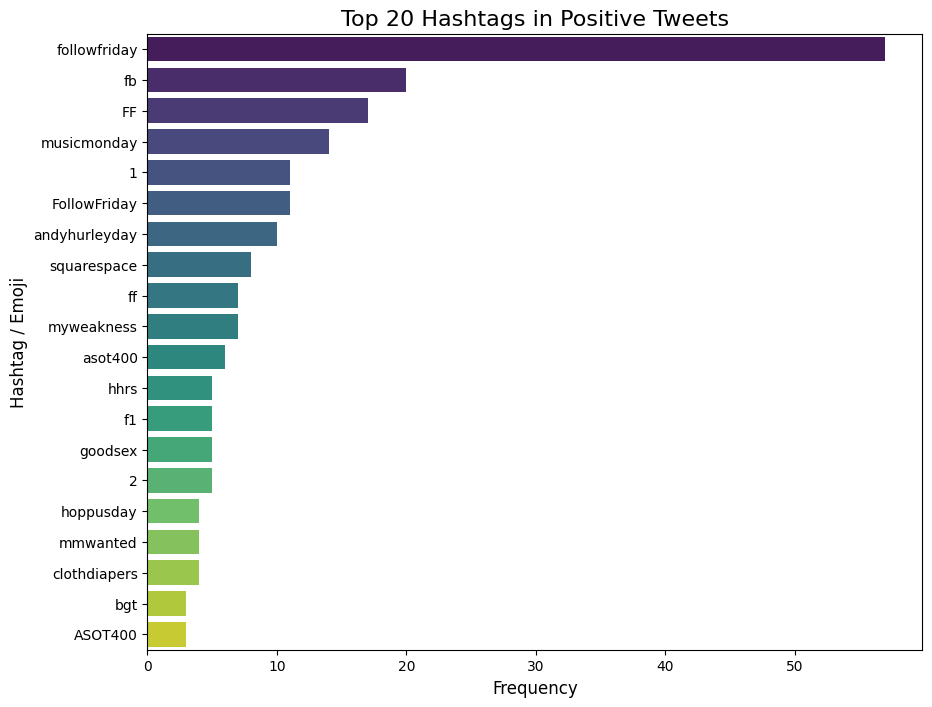


--- Generating Top Hashtags for Negative Tweets ---


C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\2227057859.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Item', data=top_df, palette='viridis')


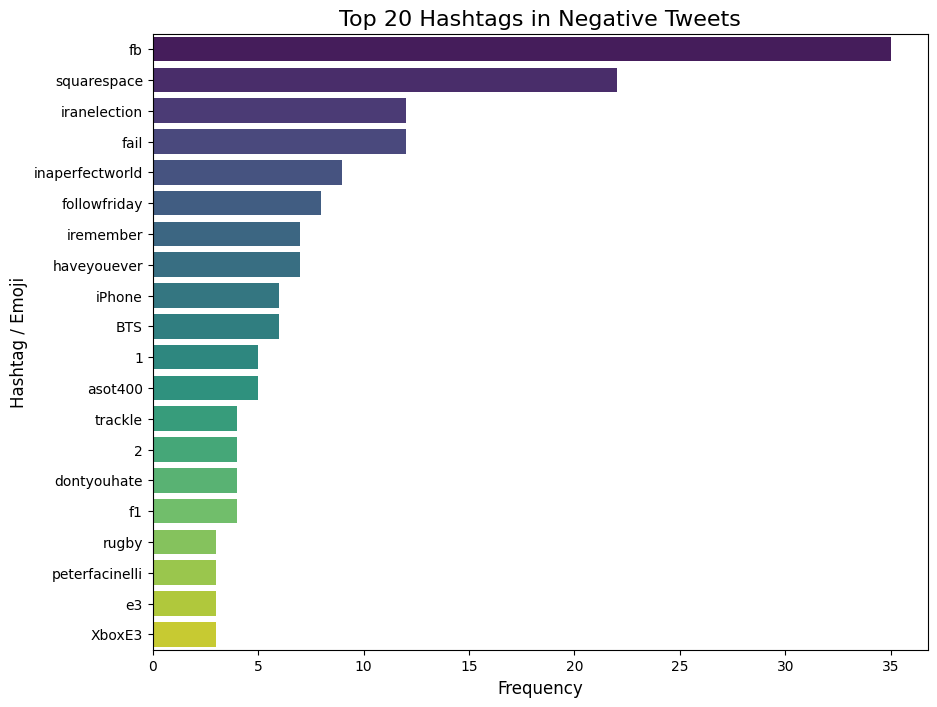


--- Generating Top Emojis for Positive Tweets ---


C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\2227057859.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Item', data=top_df, palette='viridis')


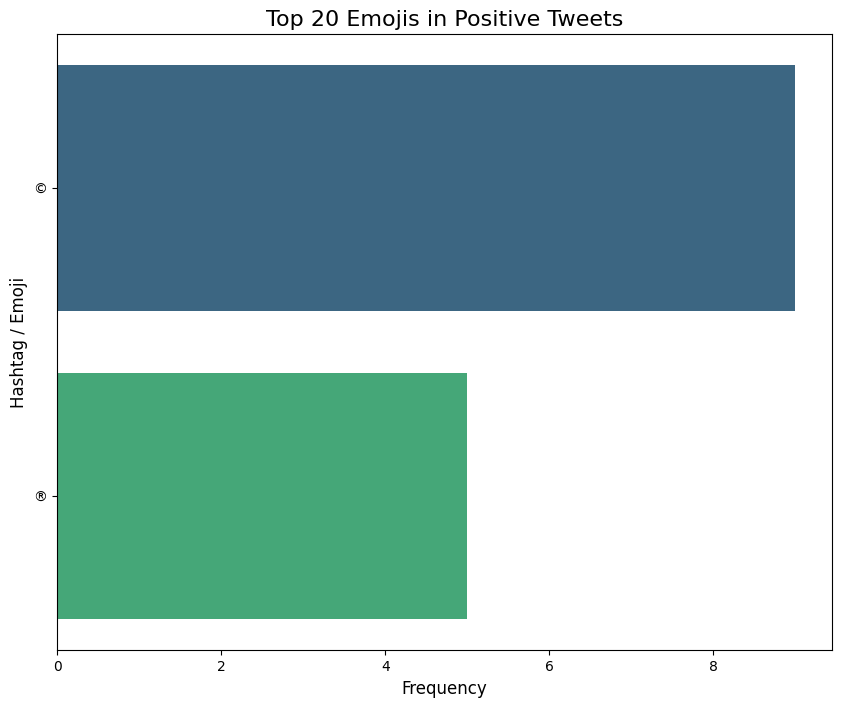

C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\2227057859.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Item', data=top_df, palette='viridis')



--- Generating Top Emojis for Negative Tweets ---


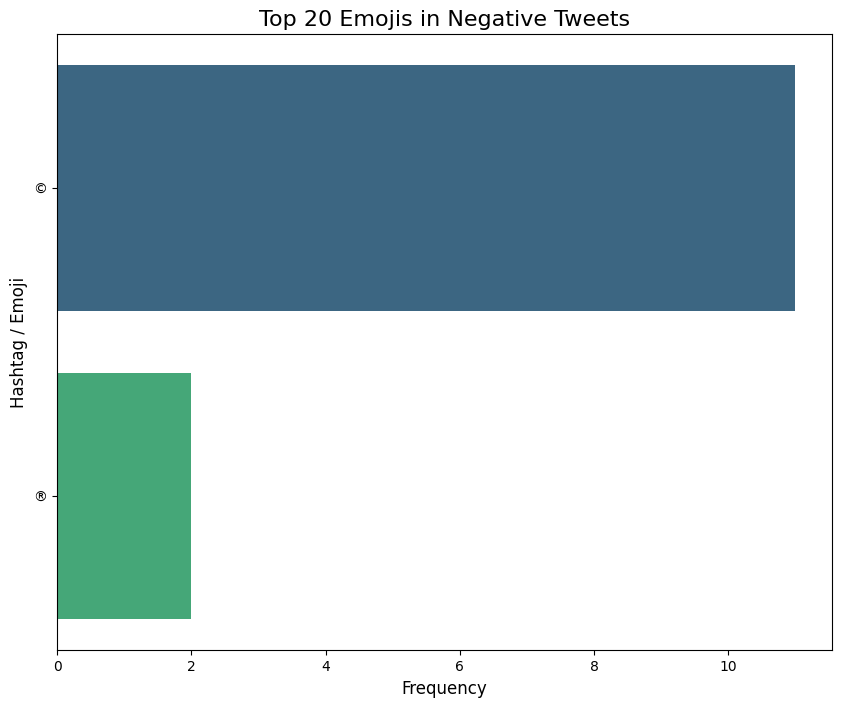

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def plot_top_items(df, column_name, sentiment, title, n=20):
    sentiment_df = df[df['target'] == sentiment]
    items_list = sentiment_df[column_name].dropna()

    all_items = [item for sublist in items_list for item in sublist]

    item_counts = Counter(all_items)
    
    top_df = pd.DataFrame(item_counts.most_common(n), columns=['Item', 'Frequency'])

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Frequency', y='Item', data=top_df, palette='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Hashtag / Emoji', fontsize=12)
    plt.show()

print("--- Generating Top Hashtags for Positive Tweets ---")
plot_top_items(df, 'hashtags', 1, "Top 20 Hashtags in Positive Tweets")

print("\n--- Generating Top Hashtags for Negative Tweets ---")
plot_top_items(df, 'hashtags', 0, "Top 20 Hashtags in Negative Tweets")

print("\n--- Generating Top Emojis for Positive Tweets ---")
plot_top_items(df, 'emojis_list', 1, "Top 20 Emojis in Positive Tweets")

print("\n--- Generating Top Emojis for Negative Tweets ---")
plot_top_items(df, 'emojis_list', 0, "Top 20 Emojis in Negative Tweets")

Barplot representation of Hashtag & Emoji

In [ ]:
import pandas as pd
from transformers import pipeline

print("Loading sentiment analysis pipeline...")
sentiment_pipeline = pipeline("sentiment-analysis")
print("Pipeline loaded.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Loading sentiment analysis pipeline...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Pipeline loaded.


Loaded the sentiment analysis pipeline for conflicting hashtag and emoji

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab datasets/training.1600000.processed.noemoticon.csv'
df_bert = pd.read_csv(file_path, encoding='latin-1')
df_bert = df_bert.sample(n=100000, random_state=42).reset_index(drop=True)
columns_names = ['target', 'ids', 'date', 'flag', 'user', 'text']
df_bert.columns = columns_names

Made a seperate dataframe because their sentiment is being calculated by BERT

In [ ]:
file_path = '/content/drive/MyDrive/Colab datasets/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='latin-1')
df = df.sample(n=100000, random_state=42).reset_index(drop=True)
columns_names = ['target', 'ids', 'date', 'flag', 'user', 'text']

df.columns = columns_names

df['target'] = df['target'].replace(4, 1)

Performing the same operation for the target value {0,1}

In [ ]:
import re

def extract_and_remove_hashtags(text):
    hashtags = re.findall(r"#(\w+)", text)

    clean_text = re.sub(r"#\w+\s*", "", text).strip()

    return clean_text, hashtags

import pandas as pd
import re

df[['cleaned_text', 'hashtags']] = df['text'].apply(
    lambda x: pd.Series(extract_and_remove_hashtags(x))
)

print("\nDataFrame with new columns:")
print(df.columns)


DataFrame with new columns:
Index(['target', 'ids', 'date', 'flag', 'user', 'text', 'cleaned_text',
       'hashtags'],
      dtype='object')


In [ ]:
import emoji

df['emojis_list'] = df['text'].apply(emoji.distinct_emoji_list)

df['emojis'] = df['emojis_list'].apply(
    lambda lst: [emoji.demojize(e).strip(':').replace('_', ' ') for e in lst]
)

df['cleaned_text'] = df['text'].apply(lambda x: emoji.replace_emoji(x, replace='')).str.strip()



print("DataFrame after corrected emoji processing:")
print(df.columns)

DataFrame after corrected emoji processing:
Index(['target', 'ids', 'date', 'flag', 'user', 'text', 'cleaned_text',
       'hashtags', 'emojis_list', 'emojis'],
      dtype='object')


In the above two code added the new columns for the hashtag and emoji

/tmp/ipython-input-24-1818066926.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_consistency', data=df_bert, palette='viridis')


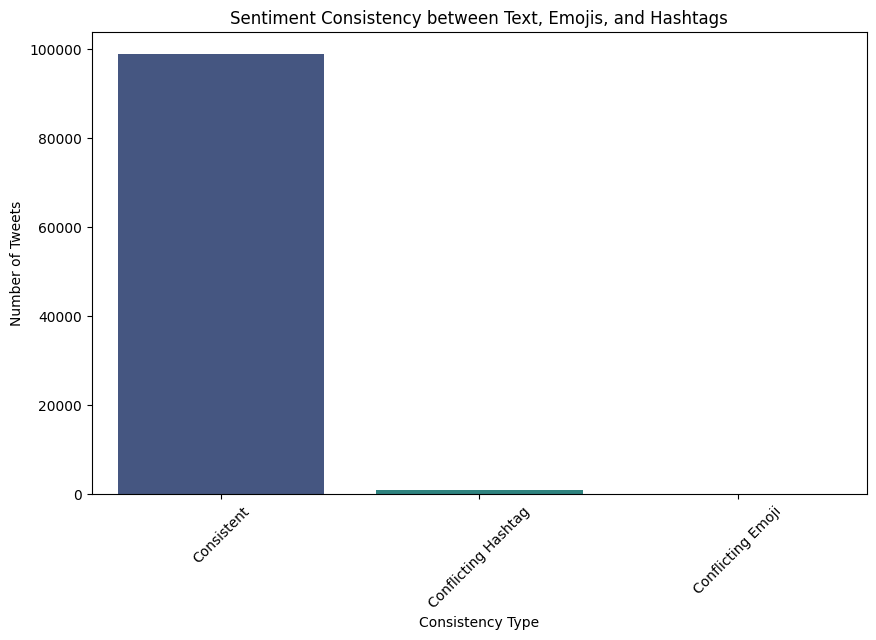

In [ ]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

def get_sentiment(text, pipeline):
    if isinstance(text, list):
        text = " ".join(text)

    if not text or pd.isna(text):
        return "NEUTRAL"
    truncated_text = text[:512]
    result = pipeline(truncated_text)
    return result[0]['label']

df_bert = df[['target', 'text', 'cleaned_text', 'hashtags', 'emojis_list', 'emojis']].copy()

text_sentiments = df_bert['cleaned_text'].apply(lambda x: get_sentiment(x, sentiment_pipeline))
emoji_sentiments = df_bert['emojis'].apply(lambda x: get_sentiment(x, sentiment_pipeline))
hashtag_sentiments = df_bert['hashtags'].apply(lambda x: get_sentiment(x, sentiment_pipeline))

df_bert['text_sentiment'] = text_sentiments
df_bert['emoji_sentiment'] = emoji_sentiments
df_bert['hashtag_sentiment'] = hashtag_sentiments


def check_consistency(row):
    sentiments = {row['text_sentiment'], row['emoji_sentiment'], row['hashtag_sentiment']}

    sentiments.discard("NEUTRAL")

    if len(sentiments) > 1:
        if "POSITIVE" in sentiments and "NEGATIVE" in sentiments:
            if row['text_sentiment'] != row['emoji_sentiment'] and row['emoji_sentiment'] != 'NEUTRAL':
                return "Conflicting Emoji"
            elif row['text_sentiment'] != row['hashtag_sentiment'] and row['hashtag_sentiment'] != 'NEUTRAL':
                return "Conflicting Hashtag"
            else:
                return "Mixed"
        else:
            return "Consistent"
    elif len(sentiments) == 1:
        return "Consistent"
    else:
        return "Neutral Only"

df_bert['sentiment_consistency'] = df_bert.apply(check_consistency, axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_consistency', data=df_bert, palette='viridis')
plt.title('Sentiment Consistency between Text, Emojis, and Hashtags')
plt.xlabel('Consistency Type')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

Checked the Conflicting part :
1)The count of the Conflicting hashtag is Negligible and we can assume that they were might be used as sarcasm
2)No Conflicting Emoji

In [ ]:
import pandas as pd
import re

def extract_and_remove_mentions(text):
    
    mentions = re.findall(r"@(\w+)", text)
    
    clean_text = re.sub(r"@\w+", "", text).strip()
    
    return clean_text, mentions


df[['cleaned_text', 'mentions']] = df['text'].apply(
    lambda tweet: pd.Series(extract_and_remove_mentions(tweet))
)

print(df)

        target         ids                          date      flag  \
541200       0  2200003313  Tue Jun 16 18:18:13 PDT 2009  NO_QUERY   
750          0  1467998601  Mon Apr 06 23:11:18 PDT 2009  NO_QUERY   
766711       0  2300049112  Tue Jun 23 13:40:12 PDT 2009  NO_QUERY   
285055       0  1993474319  Mon Jun 01 10:26:09 PDT 2009  NO_QUERY   
705995       0  2256551006  Sat Jun 20 12:56:51 PDT 2009  NO_QUERY   
...        ...         ...                           ...       ...   
199266       0  1971396414  Sat May 30 07:00:40 PDT 2009  NO_QUERY   
210814       0  1974331845  Sat May 30 12:54:52 PDT 2009  NO_QUERY   
180674       0  1966611329  Fri May 29 18:04:55 PDT 2009  NO_QUERY   
364859       0  2048348112  Fri Jun 05 15:03:23 PDT 2009  NO_QUERY   
172400       0  1963565198  Fri May 29 12:55:00 PDT 2009  NO_QUERY   

                  user                                               text  \
541200   DEWGetMeTho77  @Nkluvr4eva My poor little dumpling  In Holmde...   
750  

Added colum for the mentiones

In [ ]:
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_sm")

df['mentions'] = df['text'].str.findall(r"@(\w+)")

mentions_series = df['mentions'].explode().dropna()

if not mentions_series.empty:
    docs = list(nlp.pipe(mentions_series, disable=["tok2vec", "parser", "attribute_ruler", "lemmatizer"]))

    processed_mentions = [
        doc.text if doc.ents and doc.ents[0].label_ == "ORG" else 'user'
        for doc in docs
    ]
    
    processed_series = pd.Series(processed_mentions, index=mentions_series.index)
    
    df['processed_mentions'] = processed_series.groupby(level=0).agg(list)

df['processed_mentions'] = df['processed_mentions'].reindex(df.index, fill_value=[])


print(df[['text', 'mentions', 'processed_mentions']])

                                                     text      mentions  \
541200  @Nkluvr4eva My poor little dumpling  In Holmde...  [Nkluvr4eva]   
750     I'm off too bed. I gotta wake up hella early t...            []   
766711  I havent been able to listen to it yet  My spe...            []   
285055  now remembers why solving a relatively big equ...            []   
705995                           Ate too much, feel sick             []   
...                                                   ...           ...   
199266  as much as i wanna eat this ham sandwhich, i c...            []   
210814  Ok I GUESS I will stop bsing and get on the hi...            []   
180674  @spaciireth was planning on next month, but ap...  [spaciireth]   
364859                         at work till 2:30 tonight             []   
172400           Fkkk at the nurses coughing up my lungs             []   

       processed_mentions  
541200             [user]  
750                   NaN  
766711         

Changed the mentioned user as "USER"(Noise) and Org's are left as it is

--- Aggregated Sentiment Counts ---
target        Negative  Positive
mention_type                    
Organization      1699      2663
User              8186     12179

--- Data Ready for Plotting ---
   mention_type Sentiment  Count
0  Organization  Negative   1699
1          User  Negative   8186
2  Organization  Positive   2663
3          User  Positive  12179


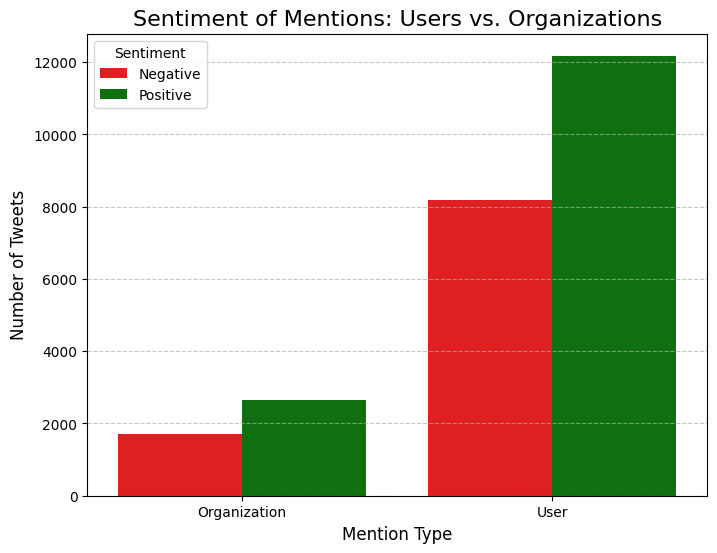

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mentions_df = df.explode('processed_mentions').dropna()

mentions_df['mention_type'] = mentions_df['processed_mentions'].apply(
    lambda x: 'User' if x == 'user' else 'Organization'
)

sentiment_counts = pd.crosstab(
    mentions_df['mention_type'], 
    mentions_df['target']
)

sentiment_counts.rename(columns={0: 'Negative', 1: 'Positive'}, inplace=True)

print("--- Aggregated Sentiment Counts ---")
print(sentiment_counts)

plot_data = sentiment_counts.reset_index()
plot_data_melted = plot_data.melt(
    id_vars='mention_type', 
    var_name='Sentiment', 
    value_name='Count'
)

print("\n--- Data Ready for Plotting ---")
print(plot_data_melted)

plt.figure(figsize=(8, 6))
sns.barplot(x='mention_type', y='Count', hue='Sentiment', data=plot_data_melted, palette={'Negative': 'red', 'Positive': 'green'})

plt.title('Sentiment of Mentions: Users vs. Organizations', fontsize=16)
plt.xlabel('Mention Type', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Sentiment of Mentions Graph

In [ ]:
import pandas as pd
import re
import spacy

nlp = spacy.load("en_core_web_sm")

print("Starting feature engineering...")
df['exclamation_count'] = df['text'].str.count('!')

df['question_count'] = df['text'].str.count(r'\?')

df['caps_count'] = df['text'].str.findall(r'\b[A-Z]{2,}\b').str.len()
print("Feature engineering complete.")
print(df[['text', 'exclamation_count', 'question_count', 'caps_count']].head())

Starting feature engineering...
Feature engineering complete.
                                                     text  exclamation_count  \
541200  @Nkluvr4eva My poor little dumpling  In Holmde...                  0   
750     I'm off too bed. I gotta wake up hella early t...                  0   
766711  I havent been able to listen to it yet  My spe...                  0   
285055  now remembers why solving a relatively big equ...                  0   
705995                           Ate too much, feel sick                   0   

        question_count  caps_count  
541200               0           0  
750                  0           0  
766711               0           0  
285055               0           0  
705995               0           0  


Added columns for the count of exclamations, questionmark and capitalizations

C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\4088024095.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='exclamation_count', data=df, ax=ax1, palette=['red', 'green'])
C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\4088024095.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='caps_count', data=df, ax=ax2, palette=['red', 'green'])
C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\4088024095.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='question_count', data=df, ax=ax2, palette=['red',

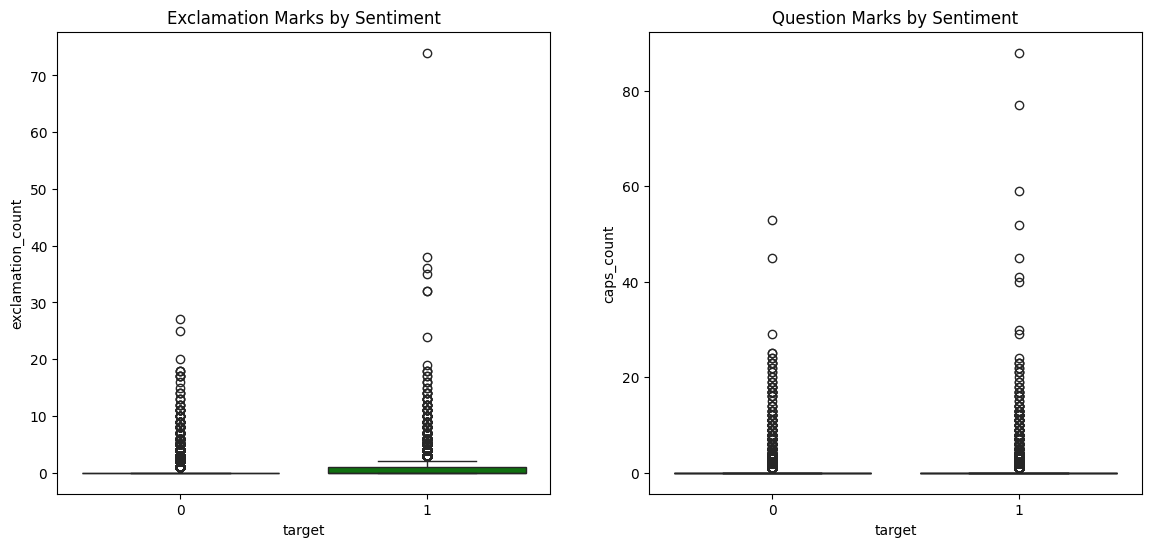

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='target', y='exclamation_count', data=df, ax=ax1, palette=['red', 'green'])
ax1.set_title('Exclamation Marks by Sentiment')

sns.boxplot(x='target', y='caps_count', data=df, ax=ax2, palette=['red', 'green'])
ax2.set_title('Capitalized Words by Sentiment')

sns.boxplot(x='target', y='question_count', data=df, ax=ax2, palette=['red', 'green'])
ax2.set_title('Question Marks by Sentiment')


plt.show()

Punctuation & Capitalization Usage

In [ ]:
df['char_length'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

Added columns for the Char Length and Word Count

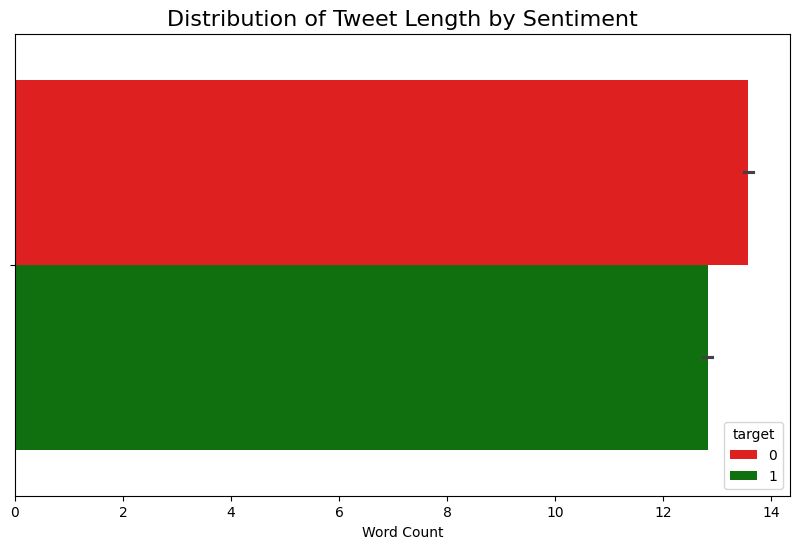

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['word_count'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='word_count', hue='target', palette=['red', 'green'])
plt.title('Distribution of Tweet Length by Sentiment', fontsize=16)
plt.xlabel('Word Count')
plt.show()

Bar plot for character length by sentiment

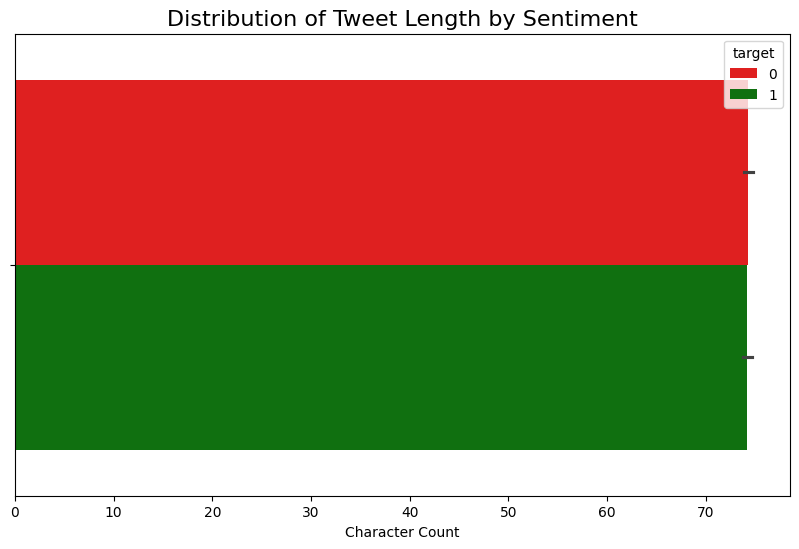

In [ ]:
df['char_length'] = df['text'].apply(lambda x: len(x))

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='char_length', hue='target', palette=['red', 'green'])
plt.title('Distribution of Character Length by Sentiment', fontsize=16)
plt.xlabel('Character Count')
plt.show()

Bar plot for Tweet length by sentiment

In [ ]:
import pandas as pd

df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

df.dropna(subset=['datetime'], inplace=True)

df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek

print("DataFrame with time features:")
print(df[['date', 'datetime', 'hour', 'day_of_week']].head())

DataFrame with time features:
                                date            datetime  hour  day_of_week
541200  Tue Jun 16 18:18:13 PDT 2009 2009-06-16 18:18:13    18            1
750     Mon Apr 06 23:11:18 PDT 2009 2009-04-06 23:11:18    23            0
766711  Tue Jun 23 13:40:12 PDT 2009 2009-06-23 13:40:12    13            1
285055  Mon Jun 01 10:26:09 PDT 2009 2009-06-01 10:26:09    10            0
705995  Sat Jun 20 12:56:51 PDT 2009 2009-06-20 12:56:51    12            5


C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\2760159686.py:9: FutureWarning: Parsed string "Tue Jun 16 18:18:13 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['datetime'] = pd.to_datetime(df['date'], errors='coerce')


date feature column added

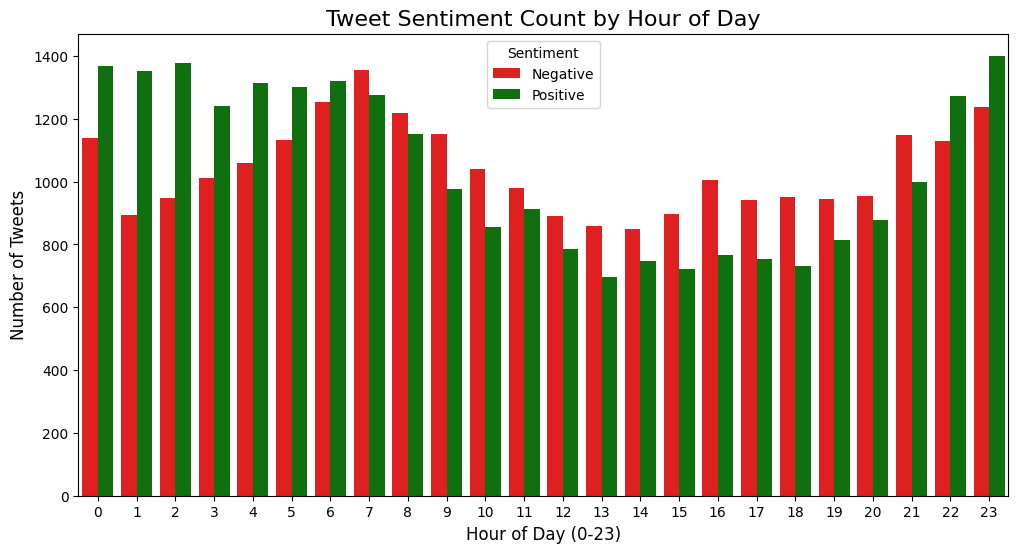

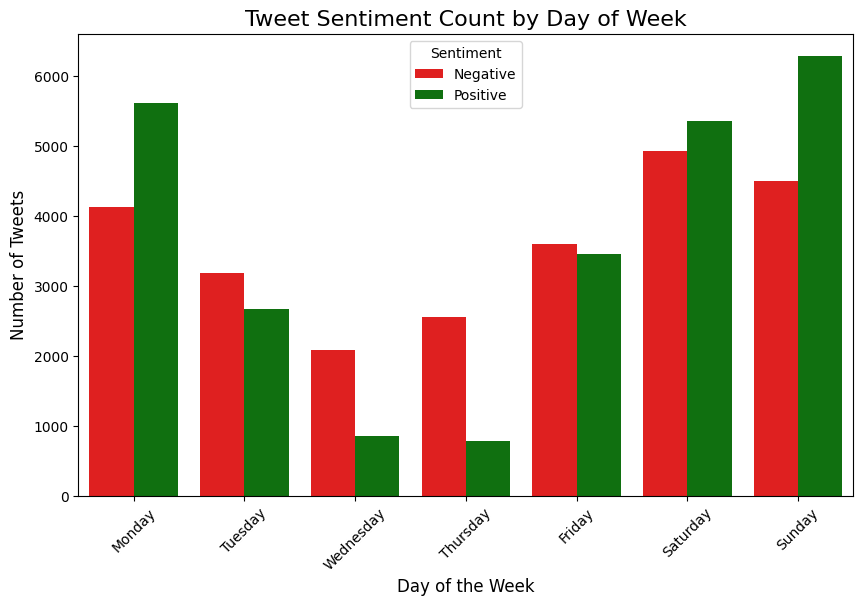

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['sentiment_label'] = df['target'].map({0: 'Negative', 1: 'Positive'})


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hour', hue='sentiment_label', palette={'Negative': 'red', 'Positive': 'green'})
plt.title('Tweet Sentiment Count by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.legend(title='Sentiment')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='sentiment_label', palette={'Negative': 'red', 'Positive': 'green'})

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(ticks=range(7), labels=day_names, rotation=45)

plt.title('Tweet Sentiment Count by Day of Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.legend(title='Sentiment')
plt.show()

Bar Plot for date and day sentiment visualization

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_score(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    return 0.0

df['vader_score'] = df['text'].apply(get_vader_score)

print("\nDataFrame with VADER scores:")
print(df[['text', 'vader_score']].head())


DataFrame with VADER scores:
                                                     text  vader_score
541200  @Nkluvr4eva My poor little dumpling  In Holmde...      -0.4013
750     I'm off too bed. I gotta wake up hella early t...       0.0000
766711  I havent been able to listen to it yet  My spe...       0.0000
285055  now remembers why solving a relatively big equ...      -0.2944
705995                           Ate too much, feel sick       -0.5106


Vader sentiment score analysis

C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\540366015.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentiment')


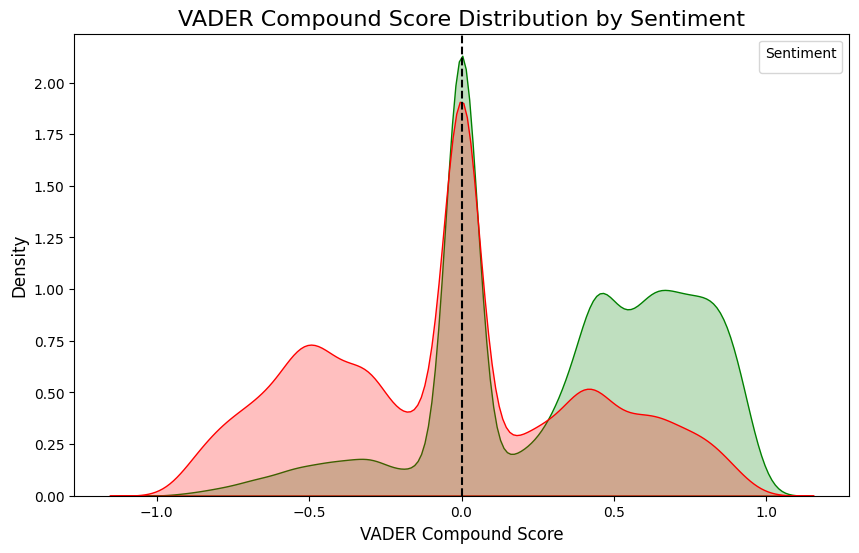

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['sentiment_label'] = df['target'].map({0: 'Negative', 1: 'Positive'})

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='vader_score', hue='sentiment_label', 
            fill=True, common_norm=False, palette={'Negative': 'red', 'Positive': 'green'})

plt.title('VADER Compound Score Distribution by Sentiment', fontsize=16)
plt.xlabel('VADER Compound Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.axvline(0, color='black', linestyle='--')
plt.legend(title='Sentiment')
plt.show()

KDE Plot for the Vader compound score Visualization

In [ ]:
import pandas as pd
import spacy

def count_pos_tags(text):
    if not isinstance(text, str):
        return pd.Series([0, 0], index=['adjective_count', 'adverb_count'])
        
    doc = nlp(text)
    adj_count = 0
    adv_count = 0
    for token in doc:
        if token.pos_ == 'ADJ':
            adj_count += 1
        elif token.pos_ == 'ADV':
            adv_count += 1
            
    return pd.Series([adj_count, adv_count], index=['adjective_count', 'adverb_count'])

print("Calculating POS tag counts...")
df[['adjective_count', 'adverb_count']] = df['cleaned_text'].apply(count_pos_tags)
print("POS tag counts added.")

print("\nDataFrame with POS tag counts:")
print(df[['cleaned_text', 'adjective_count', 'adverb_count']].head())

Calculating POS tag counts...
POS tag counts added.

DataFrame with POS tag counts:
                                             cleaned_text  adjective_count  \
541200  My poor little dumpling  In Holmdel vids he wa...                3   
750     I'm off too bed. I gotta wake up hella early t...                0   
766711  I havent been able to listen to it yet  My spe...                1   
285055  now remembers why solving a relatively big equ...                2   
705995                            Ate too much, feel sick                1   

        adverb_count  
541200             1  
750                3  
766711             1  
285055             2  
705995             2  


Added Feature to count no of adjectives and adverbs

Generating POS count plots...


C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\4075582195.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_label', y='adjective_count', data=df, ax=ax1, palette={'Negative': 'red', 'Positive': 'green'})
C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\4075582195.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_label', y='adverb_count', data=df, ax=ax2, palette={'Negative': 'red', 'Positive': 'green'})


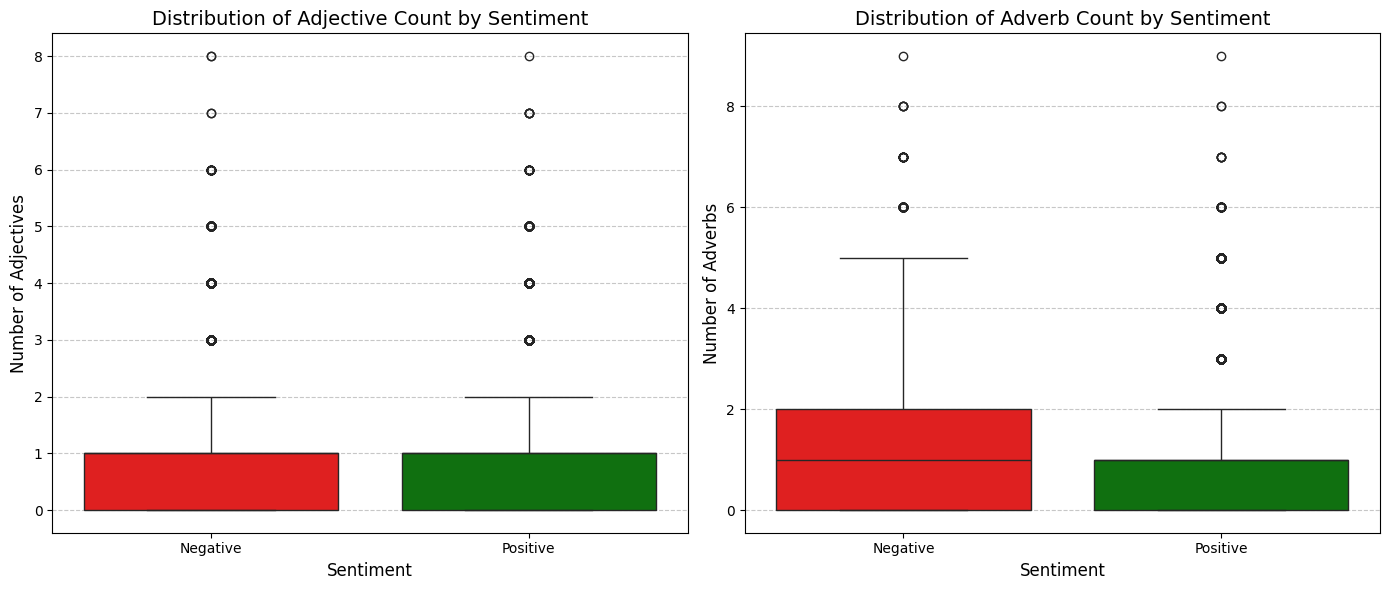

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['sentiment_label'] = df['target'].map({0: 'Negative', 1: 'Positive'})

print("Generating POS count plots...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='sentiment_label', y='adjective_count', data=df, ax=ax1, palette={'Negative': 'red', 'Positive': 'green'})
ax1.set_title('Distribution of Adjective Count by Sentiment', fontsize=14)
ax1.set_xlabel('Sentiment', fontsize=12)
ax1.set_ylabel('Number of Adjectives', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7)


sns.boxplot(x='sentiment_label', y='adverb_count', data=df, ax=ax2, palette={'Negative': 'red', 'Positive': 'green'})
ax2.set_title('Distribution of Adverb Count by Sentiment', fontsize=14)
ax2.set_xlabel('Sentiment', fontsize=12)
ax2.set_ylabel('Number of Adverbs', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

BoxPlot for count adjectives and adverbs 

In [ ]:
import pandas as pd
import textstat

def calculate_flesch(text):
    if isinstance(text, str):
        try:
            return textstat.flesch_reading_ease(text)
        except:
            return 0
    return 0

print("Calculating Flesch Reading Ease scores...")
df['flesch_score'] = df['text'].apply(calculate_flesch)
print("Flesch scores added.")

print("\nDataFrame with Flesch Reading Ease scores:")
print(df[['text', 'flesch_score']].head())

Calculating Flesch Reading Ease scores...
Flesch scores added.

DataFrame with Flesch Reading Ease scores:
                                                     text  flesch_score
541200  @Nkluvr4eva My poor little dumpling  In Holmde...     81.424079
750     I'm off too bed. I gotta wake up hella early t...     73.845000
766711  I havent been able to listen to it yet  My spe...     83.009231
285055  now remembers why solving a relatively big equ...     56.965000
705995                           Ate too much, feel sick     117.160000


Calculate Flesch Reading Ease

Calculating Flesch Reading Ease scores...
Flesch scores added.

DataFrame with Flesch Reading Ease scores:
                                                     text  flesch_score
541200  @Nkluvr4eva My poor little dumpling  In Holmde...     81.424079
750     I'm off too bed. I gotta wake up hella early t...     73.845000
766711  I havent been able to listen to it yet  My spe...     83.009231
285055  now remembers why solving a relatively big equ...     56.965000
705995                           Ate too much, feel sick     117.160000
Generating Flesch score plot...


C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\1256466218.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentiment')


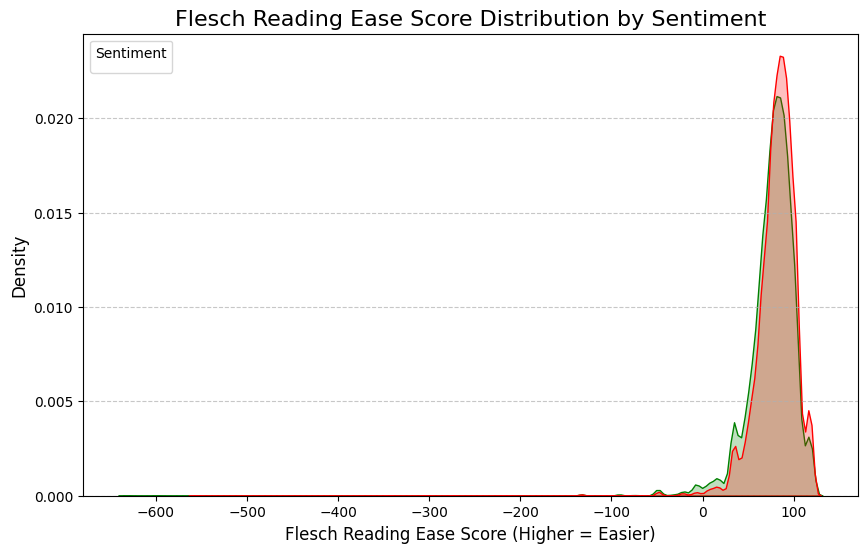

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textstat

def calculate_flesch(text):
    if isinstance(text, str):
        try:
            return textstat.flesch_reading_ease(text)
        except:
            return 0
    return 0

print("Calculating Flesch Reading Ease scores...")
df['flesch_score'] = df['text'].apply(calculate_flesch)
print("Flesch scores added.")

print("\nDataFrame with Flesch Reading Ease scores:")
print(df[['text', 'flesch_score']].head())
print("Generating Flesch score plot...")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='flesch_score', hue='sentiment_label', 
            fill=True, common_norm=False, palette={'Negative': 'red', 'Positive': 'green'})

plt.title('Flesch Reading Ease Score Distribution by Sentiment', fontsize=16)
plt.xlabel('Flesch Reading Ease Score (Higher = Easier)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

KDE plot for visualization Flesch Reading Ease

In [ ]:
import pandas as pd
import re

NEGATIONS = ["not", "no", "never", "none", "without", "n't", "dont", "cant", "wasnt", "isnt", "arent", "havent", "hasnt", "wont", "wouldnt", "shouldnt", "couldnt"]
POSITIVE_WORDS = {"good", "great", "love", "happy", "like", "amazing", "awesome", "nice", "best", "excellent"}
NEGATIVE_WORDS = {"bad", "hate", "sad", "terrible", "awful", "worst", "poor", "difficult", "problem", "issue"}

def check_negated_sentiment(text):
    if not isinstance(text, str):
        return 0
        
    words = re.findall(r'\b\w+\b', text.lower())
    
    for i, word in enumerate(words):
        if word in NEGATIONS:
            for j in range(i + 1, min(i + 4, len(words))):
                if words[j] in POSITIVE_WORDS or words[j] in NEGATIVE_WORDS:
                    return 1
    return 0

print("Checking for negated sentiment...")
df['negated_sentiment_flag'] = df['text'].apply(check_negated_sentiment)
print("Negation flag added.")

print("\nDataFrame with negation flag:")
print(df[df['negated_sentiment_flag'] == 1][['text', 'negated_sentiment_flag']].head())
print("\nExamples without the flag:")
print(df[df['negated_sentiment_flag'] == 0][['text', 'negated_sentiment_flag']].head())

Checking for negated sentiment...
Negation flag added.

DataFrame with negation flag:
                                                      text  \
1286486  @ibbypop haha yeeahh yeahh you know its only t...   
384326   @bertpalmer not a good season so far for him i...   
702377   my dad wont let my mom come get me  jerk! i wa...   
1367519  @romaiel Not a good time for a relationship.  ...   
99139    i have a headache almost everyday and nightmar...   

         negated_sentiment_flag  
1286486                       1  
384326                        1  
702377                        1  
1367519                       1  
99139                         1  

Examples without the flag:
                                                     text  \
541200  @Nkluvr4eva My poor little dumpling  In Holmde...   
750     I'm off too bed. I gotta wake up hella early t...   
766711  I havent been able to listen to it yet  My spe...   
285055  now remembers why solving a relatively big equ...   
7059

Negation Handling Feature

Generating negation flag plot...


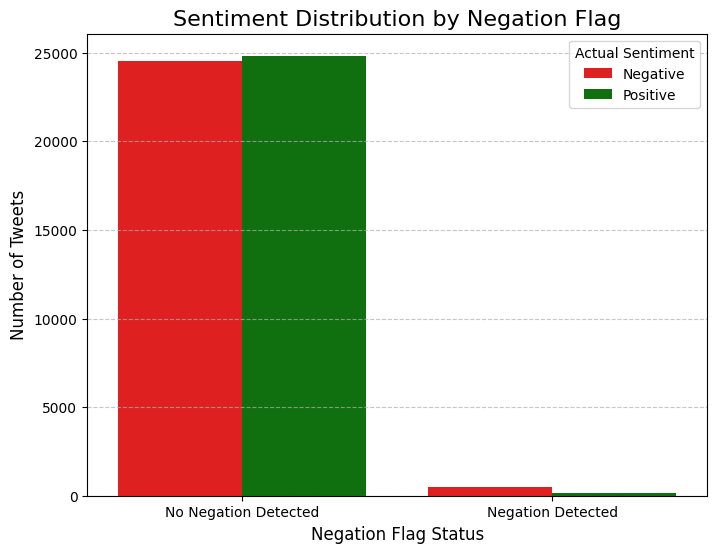

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['sentiment_label'] = df['target'].map({0: 'Negative', 1: 'Positive'})

print("Generating negation flag plot...")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='negated_sentiment_flag', hue='sentiment_label', palette={'Negative': 'red', 'Positive': 'green'})

plt.xticks(ticks=[0, 1], labels=['No Negation Detected', 'Negation Detected'])

plt.title('Sentiment Distribution by Negation Flag', fontsize=16)
plt.xlabel('Negation Flag Status', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.legend(title='Actual Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bar Plot for Visualizing Negation Detection

In [ ]:
import pandas as pd
import re

def has_multi_exclamation(text):
    if isinstance(text, str):
        return 1 if re.search(r'!!!+', text) else 0
    return 0

def has_multi_question(text):
    if isinstance(text, str):
        return 1 if re.search(r'\?\?\?+', text) else 0
    return 0

def has_both_exclamation_question(text):
    if isinstance(text, str):
        return 1 if '!' in text and '?' in text else 0
    return 0

print("Adding punctuation pattern features...")

df['multi_exclamation_flag'] = df['text'].apply(has_multi_exclamation)
df['multi_question_flag'] = df['text'].apply(has_multi_question)
df['both_punct_flag'] = df['text'].apply(has_both_exclamation_question)

print("Punctuation pattern features added.")

print("\nExamples with multiple exclamations:")
print(df[df['multi_exclamation_flag'] == 1][['text', 'multi_exclamation_flag']].head())

print("\nExamples with multiple question marks:")
print(df[df['multi_question_flag'] == 1][['text', 'multi_question_flag']].head())

print("\nExamples with both punctuation types:")
print(df[df['both_punct_flag'] == 1][['text', 'both_punct_flag']].head())

Adding punctuation pattern features...
Punctuation pattern features added.

Examples with multiple exclamations:
                                                      text  \
1589402  Working on photos from Hillsong's 1 year celeb...   
485605   im trying to keep awake!!!!!!!!!!!!!!! its pai...   
771500   OKLAHOMA!!! for a couple hours. i'm seriously ...   
248768   FINALLY IM BACKKKKKKK!!!!!!!!!!! =D and with b...   
1501550           @mithss mourniiiiiiing eh, morniiing!!!    

         multi_exclamation_flag  
1589402                       1  
485605                        1  
771500                        1  
248768                        1  
1501550                       1  

Examples with multiple question marks:
                                                      text  \
864698                           dude where is my car ???    
129275           @spazzyyarn really? from that coffee????    
450957   @Moonflowerchild it literally makes me sick. w...   
1144575  ?????????????

Features that identify specific punctuation patterns like multiple exclamation marks, multiple question marks, and the presence of both in a single tweet

Generating punctuation pattern plots...


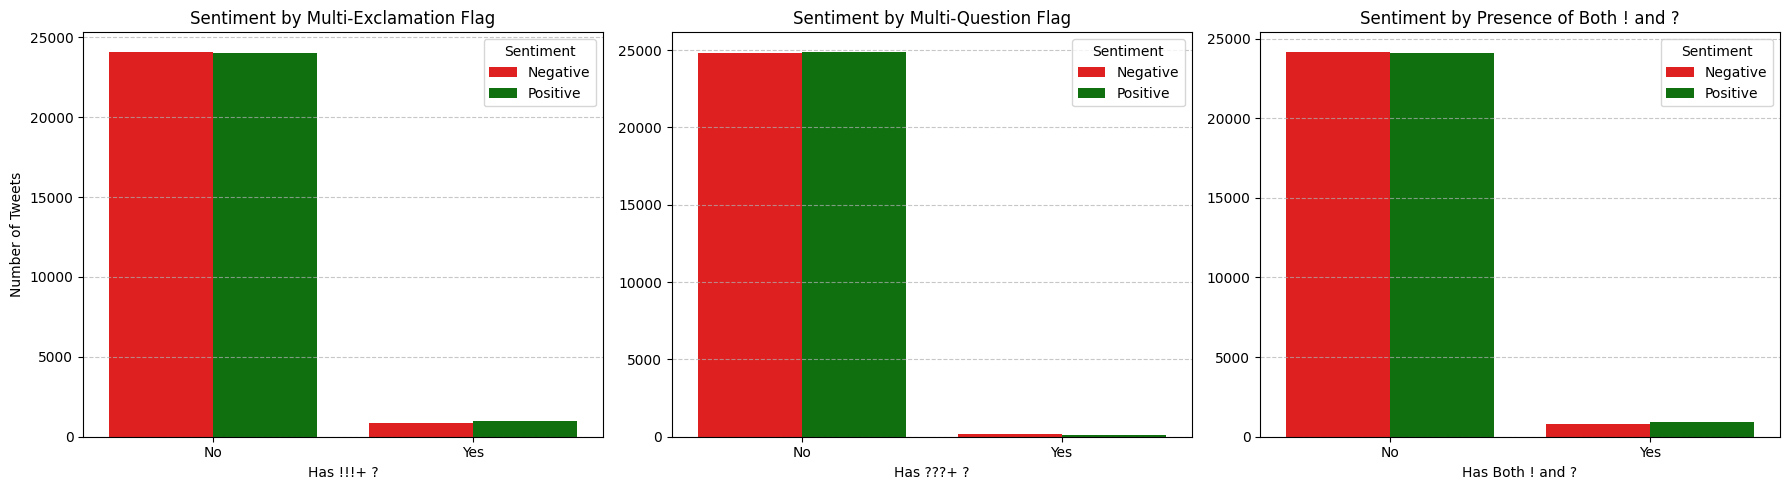

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['sentiment_label'] = df['target'].map({0: 'Negative', 1: 'Positive'})

print("Generating punctuation pattern plots...")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x='multi_exclamation_flag', hue='sentiment_label', ax=axes[0], palette={'Negative': 'red', 'Positive': 'green'})
axes[0].set_title('Sentiment by Multi-Exclamation Flag')
axes[0].set_xlabel('Has !!!+ ?')
axes[0].set_xticks(ticks=[0, 1], labels=['No', 'Yes'])
axes[0].set_ylabel('Number of Tweets')
axes[0].legend(title='Sentiment')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.countplot(data=df, x='multi_question_flag', hue='sentiment_label', ax=axes[1], palette={'Negative': 'red', 'Positive': 'green'})
axes[1].set_title('Sentiment by Multi-Question Flag')
axes[1].set_xlabel('Has ???+ ?')
axes[1].set_xticks(ticks=[0, 1], labels=['No', 'Yes'])
axes[1].set_ylabel('')
axes[1].legend(title='Sentiment')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

sns.countplot(data=df, x='both_punct_flag', hue='sentiment_label', ax=axes[2], palette={'Negative': 'red', 'Positive': 'green'})
axes[2].set_title('Sentiment by Presence of Both ! and ?')
axes[2].set_xlabel('Has Both ! and ?')
axes[2].set_xticks(ticks=[0, 1], labels=['No', 'Yes'])
axes[2].set_ylabel('')
axes[2].legend(title='Sentiment')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def get_syntactic_features(text):
    if not isinstance(text, str):
        return pd.Series([0, 0], index=['neg_mod_count', 'max_tree_depth'])
        
    doc = nlp(text)
    neg_mod_count = 0
    max_depth = 0
    
    for token in doc:
        depth = 0
        curr = token
        while curr.head != curr:
            depth += 1
            curr = curr.head
        max_depth = max(max_depth, depth)
            
        if token.dep_ == 'neg':
            if token.head.pos_ in ['VERB', 'ADJ', 'AUX']:
                neg_mod_count += 1
                
    return pd.Series([neg_mod_count, max_depth], index=['neg_mod_count', 'max_tree_depth'])

df[['neg_mod_count', 'max_tree_depth']] = df['text'].apply(get_syntactic_features)

Added column foe negative mod count and and max tree depth(Sentence Complixity)

Generating syntactic feature plots...


C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\252251108.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_label', y='max_tree_depth', data=df, ax=ax2, palette={'Negative': 'red', 'Positive': 'green'})


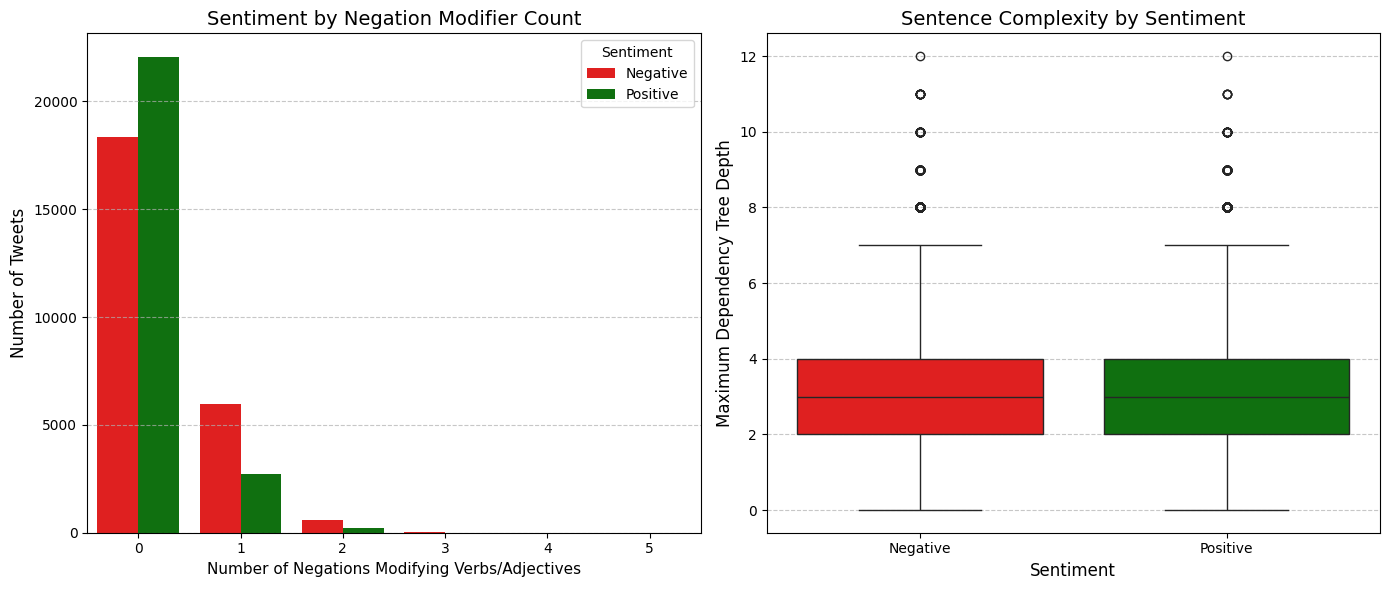

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['sentiment_label'] = df['target'].map({0: 'Negative', 1: 'Positive'})

print("Generating syntactic feature plots...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, x='neg_mod_count', hue='sentiment_label', ax=ax1, palette={'Negative': 'red', 'Positive': 'green'})
ax1.set_title('Sentiment by Negation Modifier Count', fontsize=14)
ax1.set_xlabel('Number of Negations Modifying Verbs/Adjectives', fontsize=11)
ax1.set_ylabel('Number of Tweets', fontsize=12)
ax1.legend(title='Sentiment')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(x='sentiment_label', y='max_tree_depth', data=df, ax=ax2, palette={'Negative': 'red', 'Positive': 'green'})
ax2.set_title('Sentence Complexity by Sentiment', fontsize=14)
ax2.set_xlabel('Sentiment', fontsize=12)
ax2.set_ylabel('Maximum Dependency Tree Depth', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

BarPlot for neg mod count and BoxPlot for max tree depth

In [ ]:
import pandas as pd
from afinn import Afinn

afinn = Afinn()

def calculate_afinn_score(text):
    if isinstance(text, str):
        return afinn.score(text)
    return 0.0

print("Calculating AFINN scores...")
df['afinn_score'] = df['text'].apply(calculate_afinn_score)
print("AFINN scores added.")

print("\nDataFrame with AFINN scores:")
print(df[['text', 'afinn_score']].head())

Calculating AFINN scores...
AFINN scores added.

DataFrame with AFINN scores:
                                                     text  afinn_score
541200  @Nkluvr4eva My poor little dumpling  In Holmde...         -1.0
750     I'm off too bed. I gotta wake up hella early t...          0.0
766711  I havent been able to listen to it yet  My spe...          0.0
285055  now remembers why solving a relatively big equ...          0.0
705995                           Ate too much, feel sick          -2.0


AFINN Sentiment Score Feature

Generating AFINN score plot...


C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\180477311.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentiment')


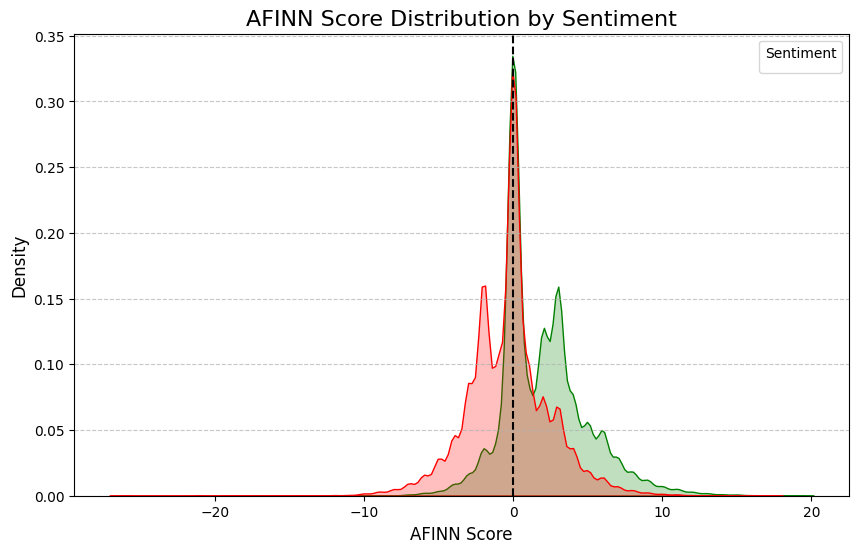

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['sentiment_label'] = df['target'].map({0: 'Negative', 1: 'Positive'})

print("Generating AFINN score plot...")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='afinn_score', hue='sentiment_label', 
            fill=True, common_norm=False, palette={'Negative': 'red', 'Positive': 'green'})

plt.title('AFINN Score Distribution by Sentiment', fontsize=16)
plt.xlabel('AFINN Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.axvline(0, color='black', linestyle='--')
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

KDE Plot for the Affin Score

In [ ]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text', 'cleaned_text',
       'hashtags', 'emojis_list', 'emoji_names', 'mentions',
       'processed_mentions', 'exclamation_count', 'question_count',
       'caps_count', 'char_length', 'word_count', 'datetime', 'hour',
       'day_of_week', 'sentiment_label', 'vader_score', 'adjective_count',
       'adverb_count', 'flesch_score', 'negated_sentiment_flag',
       'multi_exclamation_flag', 'multi_question_flag', 'both_punct_flag',
       'neg_mod_count', 'max_tree_depth', 'afinn_score'],
      dtype='object')

Name of all the Feature Columns Added

In [ ]:
print(df['cleaned_text'].head())

541200    My poor little dumpling  In Holmdel vids he wa...
750       I'm off too bed. I gotta wake up hella early t...
766711    I havent been able to listen to it yet  My spe...
285055    now remembers why solving a relatively big equ...
705995                              Ate too much, feel sick
Name: cleaned_text, dtype: object


Cleaned text free froma ny special character, Mentiones, Enojis and Hashtags

--- Generating Comparative Word Clouds ---


c:\Users\LAB\Downloads\Twitter Sentiment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\LAB\Downloads\Twitter Sentiment\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


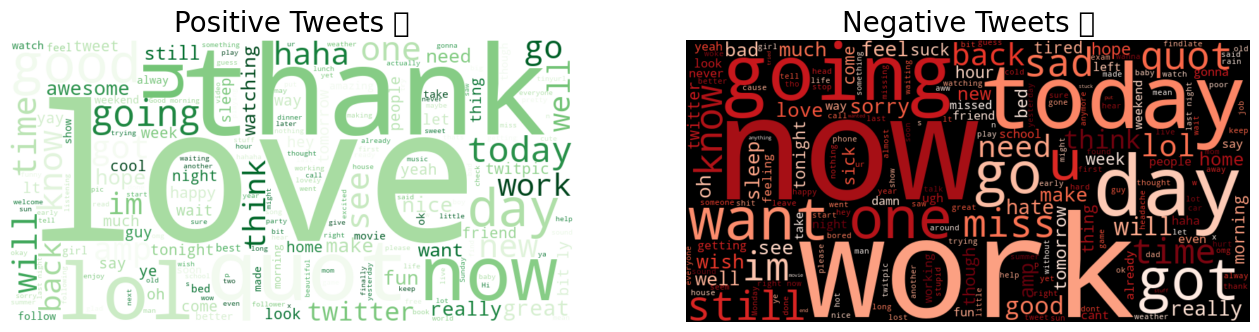

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

positive_df = df[df['target'] == 1]
negative_df = df[df['target'] == 0]

positive_text = " ".join(review for review in positive_df['cleaned_text'] if review)
negative_text = " ".join(review for review in negative_df['cleaned_text'] if review)

positive_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='Greens'
).generate(positive_text)

negative_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='black', 
    colormap='Reds'
).generate(negative_text)


print("--- Generating Comparative Word Clouds ---")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(positive_wordcloud, interpolation='bilinear')
ax1.set_title('Positive Tweets 👍', fontsize=20)
ax1.axis('off')

ax2.imshow(negative_wordcloud, interpolation='bilinear')
ax2.set_title('Negative Tweets 👎', fontsize=20)
ax2.axis('off')

plt.show()

Word Cloud Plot for the Sentiment Visualization

--- Generating Top Bigrams for Positive Tweets ---


C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\170124421.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=top_df, palette='viridis')


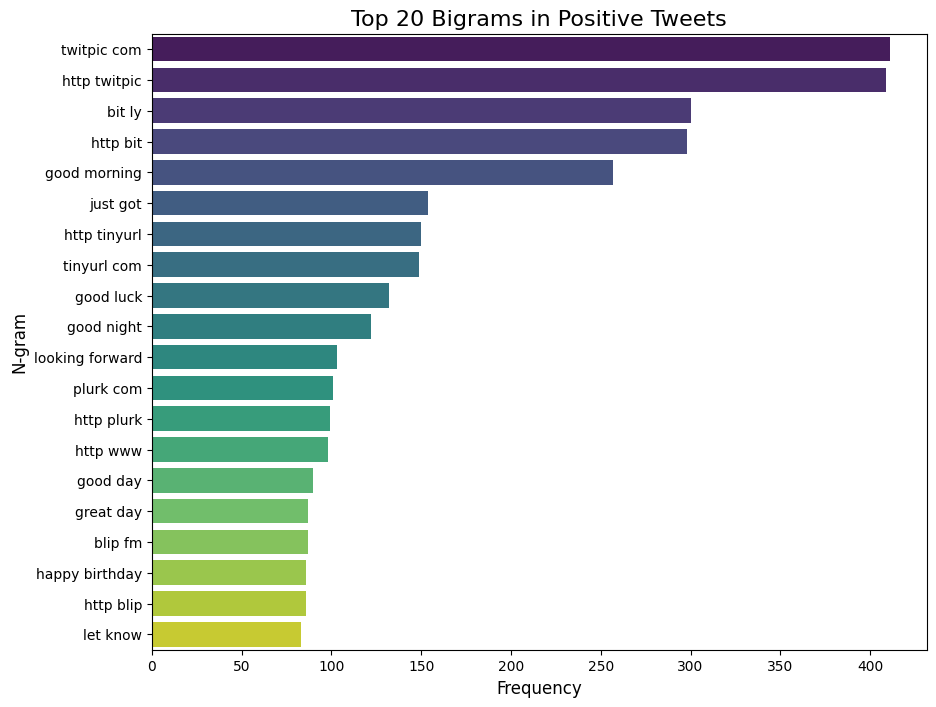


--- Generating Top Bigrams for Negative Tweets ---


C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\170124421.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=top_df, palette='viridis')


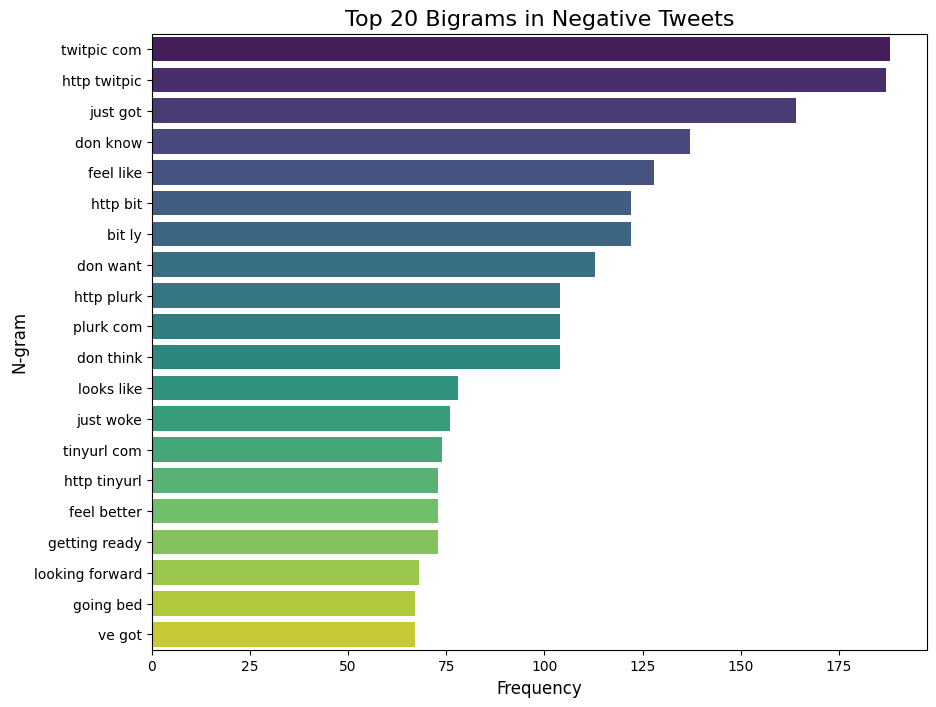

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(corpus, title, n=20, ngram_range=(2, 2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    top_df = pd.DataFrame(words_freq[:n], columns=['Ngram', 'Frequency'])
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Frequency', y='Ngram', data=top_df, palette='viridis')
    plt.title(title, fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('N-gram', fontsize=12)
    plt.show()

positive_corpus = df[df['target'] == 1]['cleaned_text'].dropna()
negative_corpus = df[df['target'] == 0]['cleaned_text'].dropna()

print("--- Generating Top Bigrams for Positive Tweets ---")
plot_top_ngrams(positive_corpus, "Top 20 Bigrams in Positive Tweets", ngram_range=(2, 2))

print("\n--- Generating Top Bigrams for Negative Tweets ---")
plot_top_ngrams(negative_corpus, "Top 20 Bigrams in Negative Tweets", ngram_range=(2, 2))

NGrams Plot for the analysis of words of Sentiment 

In [ ]:
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_sm")

print("Starting efficient text normalization...")

texts_to_process = df['cleaned_text'].fillna('').astype(str).tolist()

docs = nlp.pipe(
    texts_to_process, 
    disable=["parser", "ner"],
    batch_size=500 
)

processed_texts = []
for doc in docs:
    lemmas = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha and not token.is_stop
    ]
    processed_texts.append(" ".join(lemmas))

df['processed_text'] = processed_texts

print("\nNormalization complete.")
print("\nDataFrame with processed_text:")
print(df[['cleaned_text', 'processed_text']])

Starting efficient text normalization...

Normalization complete.

DataFrame with processed_text:
                                             cleaned_text  \
541200  My poor little dumpling  In Holmdel vids he wa...   
750     I'm off too bed. I gotta wake up hella early t...   
766711  I havent been able to listen to it yet  My spe...   
285055  now remembers why solving a relatively big equ...   
705995                            Ate too much, feel sick   
...                                                   ...   
199266  as much as i wanna eat this ham sandwhich, i c...   
210814  Ok I GUESS I will stop bsing and get on the hi...   
180674  was planning on next month, but apparently the...   
364859                          at work till 2:30 tonight   
172400            Fkkk at the nurses coughing up my lungs   

                                           processed_text  
541200  poor little dumple holmdel vid try hope not tr...  
750          bed get to wake hella early tomorrow

Text Normalization and Lemmatization

In [ ]:
import pandas as pd
import spacy
import numpy as np

nlp = spacy.load("en_core_web_md")

print("Starting efficient vector generation with nlp.pipe()...")

texts_to_process = df['cleaned_text'].fillna('').astype(str).tolist()

docs = nlp.pipe(
    texts_to_process,
    disable=["parser", "ner"],
    batch_size=500
)

vectors = [doc.vector for doc in docs]

df['vector'] = vectors

print("Vector generation complete.")

print("\n--- DataFrame with Sentence Vectors ---")
print(df)

if not df.empty and 'vector' in df.columns and len(df['vector']) > 0:
    print("\nShape of a single vector:", df['vector'].iloc[0].shape)
    if df['vector'].iloc[0].shape[0] >= 10:
        print("First 10 values of a vector:", df['vector'].iloc[0][:10])
    else:
        print("Vector has fewer than 10 values:", df['vector'].iloc[0])
else:
    print("\nDataFrame is empty or 'vector' column not generated properly.")

Starting efficient vector generation with nlp.pipe()...
Vector generation complete.

--- DataFrame with Sentence Vectors ---
        target         ids                          date      flag  \
541200       0  2200003313  Tue Jun 16 18:18:13 PDT 2009  NO_QUERY   
750          0  1467998601  Mon Apr 06 23:11:18 PDT 2009  NO_QUERY   
766711       0  2300049112  Tue Jun 23 13:40:12 PDT 2009  NO_QUERY   
285055       0  1993474319  Mon Jun 01 10:26:09 PDT 2009  NO_QUERY   
705995       0  2256551006  Sat Jun 20 12:56:51 PDT 2009  NO_QUERY   
...        ...         ...                           ...       ...   
199266       0  1971396414  Sat May 30 07:00:40 PDT 2009  NO_QUERY   
210814       0  1974331845  Sat May 30 12:54:52 PDT 2009  NO_QUERY   
180674       0  1966611329  Fri May 29 18:04:55 PDT 2009  NO_QUERY   
364859       0  2048348112  Fri Jun 05 15:03:23 PDT 2009  NO_QUERY   
172400       0  1963565198  Fri May 29 12:55:00 PDT 2009  NO_QUERY   

                  user            

Using Word Embeddings vectorization is done on the cleaned text part

In [ ]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text', 'cleaned_text',
       'hashtags', 'emojis_list', 'emoji_names', 'mentions',
       'processed_mentions', 'exclamation_count', 'question_count',
       'caps_count', 'char_length', 'word_count', 'datetime', 'hour',
       'day_of_week', 'sentiment_label', 'vader_score', 'adjective_count',
       'adverb_count', 'flesch_score', 'negated_sentiment_flag',
       'multi_exclamation_flag', 'multi_question_flag', 'both_punct_flag',
       'neg_mod_count', 'max_tree_depth', 'afinn_score', 'processed_text',
       'vector'],
      dtype='object')

Final Feature coluums before groupimh them in X features and Y target so now considering the Bias Variance tradeoff the final feature columns after EDA were hour, day_of_week, vader_score, afinn_score, neg_mod_count, flesch_score, Emoji, Hashtag and the cleaned text 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

tfidf_base_vectorizer = TfidfVectorizer(
    ngram_range=(1, 3), 
    max_features=1000
)

print("Assembling final feature matrix X...")

X_vectors = np.vstack(df['vector'].values)

numerical_feature_columns = [
    'hour', 'day_of_week', 
    'vader_score', 'afinn_score', 
    'neg_mod_count', 'flesch_score'
]
X_numeric = df[numerical_feature_columns].fillna(0).values

df['hashtag_features'] = df['hashtags'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else ''
)
df['emoji_features'] = df['emoji_names'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else ''
)
df['mention_features'] = df['processed_mentions'].apply(
    lambda x: ' '.join(x) if isinstance(x, list) else ''
)

print("Vectorizing hashtags...")
hashtag_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000)
X_hashtags = hashtag_vectorizer.fit_transform(df['hashtag_features'])

print("Vectorizing emojis...")
emoji_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=500)
X_emojis = emoji_vectorizer.fit_transform(df['emoji_features'])

print("Vectorizing mentions...")
mention_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=500)
X_mentions = mention_vectorizer.fit_transform(df['mention_features'])

print("Combining all features...")
X_final = hstack([
    X_vectors, 
    X_numeric, 
    X_hashtags,
    X_emojis,
    X_mentions
])

y = df['target'].replace(4, 1).values 
print("Target vector y is defined.")

print("\n--- DATA IS READY FOR TRAINING (ALL FEATURES INCLUDED) ---")
print(f"Shape of the final feature matrix X: {X_final.shape}")
print(f"Shape of the target vector y: {y.shape}")

Assembling final feature matrix X...
Vectorizing hashtags...
Vectorizing emojis...
Vectorizing mentions...
Combining all features...
Target vector y is defined.

--- DATA IS READY FOR TRAINING (ALL FEATURES INCLUDED) ---
Shape of the final feature matrix X: (50000, 1809)
Shape of the target vector y: (50000,)


Done the Vectorizer part on other columns and setted the x and y for its prossesing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print("\nScaling features with MaxAbsScaler...")
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling complete.")


Scaling features with MaxAbsScaler...
Scaling complete.


Split and Scaling for logestic reg

In [ ]:
import numpy as np
from scipy.sparse import random as sparse_random
import matplotlib.pyplot as plt

# Model Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression # Added for comparison

# Evaluation Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
roc_results = {}

Importing all the libraries


Tuning Logistic Regression model...


c:\Users\LAB\Downloads\Twitter Sentiment\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LAB\Downloads\Twitter Sentiment\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LAB\Downloads\Twitter Sentiment\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LAB\Downloads\Twitter Sentiment\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Tuning complete.
Best C parameter found: 1

--- Tuned Logistic Regression Results ---
              precision    recall  f1-score   support

Negative (0)       0.73      0.74      0.73      4977
Positive (1)       0.74      0.73      0.73      5023

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

ROC AUC Score: 0.8124

Plotting ROC Curves...


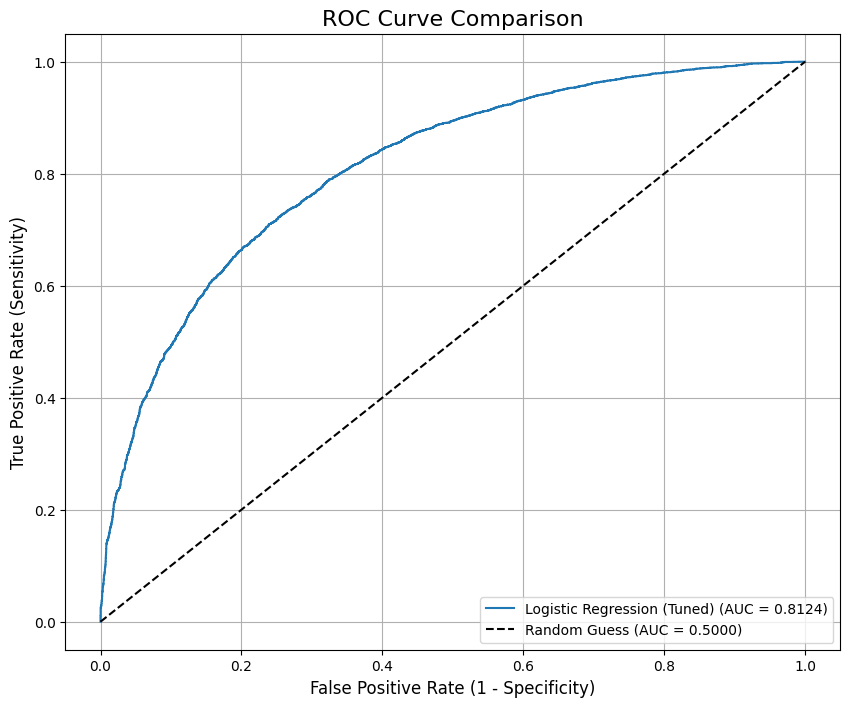

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import random as sparse_random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

print("\nTuning Logistic Regression model...")
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2']}

grid_search_lr = GridSearchCV(
    LogisticRegression(solver='saga', n_jobs=-1, max_iter=1000, random_state=42),
    param_grid,
    cv=3,
    scoring='f1_macro'
)
grid_search_lr.fit(X_train_scaled, y_train)
print("Tuning complete.")
print(f"Best C parameter found: {grid_search_lr.best_params_['C']}")

log_reg = grid_search_lr.best_estimator_

print("\n--- Tuned Logistic Regression Results ---")
y_pred_lr = log_reg.predict(X_test_scaled)
print(classification_report(y_test, y_pred_lr, target_names=['Negative (0)', 'Positive (1)']))

y_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"ROC AUC Score: {auc_lr:.4f}")
roc_results['Logistic Regression (Tuned)'] = {'y_pred_proba': y_pred_proba_lr, 'auc': auc_lr}

print("\nPlotting ROC Curves...")
plt.figure(figsize=(10, 8))

for model_name, results in roc_results.items():
    fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba'])

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {results['auc']:.4f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5000)')

plt.title('ROC Curve Comparison', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.legend(loc='lower right')
plt.grid()
plt.show()

logestic regression


Tuning Random Forest model...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Tuning complete.
Best parameters found: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 22, 'n_estimators': 1552}

--- Tuned Random Forest Results ---
              precision    recall  f1-score   support

Negative (0)       0.72      0.72      0.72      4977
Positive (1)       0.72      0.72      0.72      5023

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

ROC AUC Score: 0.7906

Random Forest evaluation complete. Results added to roc_results.

Plotting ROC Curves for all evaluated models...


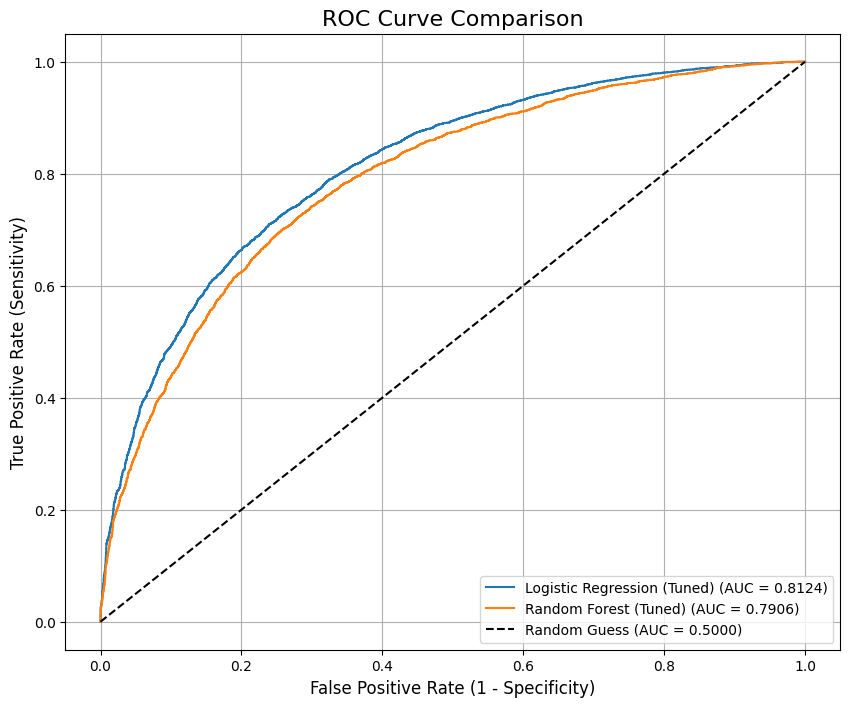

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from scipy.stats import randint

print("\nTuning Random Forest model...")
param_dist_rf = {
    'n_estimators': randint(100, 800, 1200),
    'max_depth': [20, 30, 50, 60, 70, None],
    'min_samples_split': randint(2, 11, 15),
    'min_samples_leaf': randint(1, 5, 8),
    'max_features': ['sqrt', 'log2']
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search_rf.fit(X_train_scaled, y_train)
print("\nTuning complete.")
print(f"Best parameters found: {random_search_rf.best_params_}")

best_rf = random_search_rf.best_estimator_


print("\n--- Tuned Random Forest Results ---")
y_pred_rf = best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf, target_names=['Negative (0)', 'Positive (1)']))


y_pred_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC AUC Score: {auc_rf:.4f}")

roc_results['Random Forest (Tuned)'] = {'y_pred_proba': y_pred_proba_rf, 'auc': auc_rf}

print("\nRandom Forest evaluation complete. Results added to roc_results.")

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

if 'roc_results' in locals() and roc_results:
    print("\nPlotting ROC Curves for all evaluated models...")
    plt.figure(figsize=(10, 8))

    for model_name, results in roc_results.items():
        fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba'])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {results['auc']:.4f})")

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5000)')

    plt.title('ROC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("Error: 'roc_results' dictionary not found or is empty. Please run model evaluations first.")

Random Forest classifier


Tuning SVM (LinearSVC) model...
Fitting 3 folds for each of 3 candidates, totalling 9 fits

Tuning complete.
Best C parameter found: 0.1

--- Tuned SVM (LinearSVC) Results ---
              precision    recall  f1-score   support

Negative (0)       0.73      0.73      0.73      4977
Positive (1)       0.74      0.73      0.74      5023

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

ROC AUC Score: 0.8125

SVM evaluation complete. Results added to roc_results.

Plotting ROC Curves for all evaluated models...


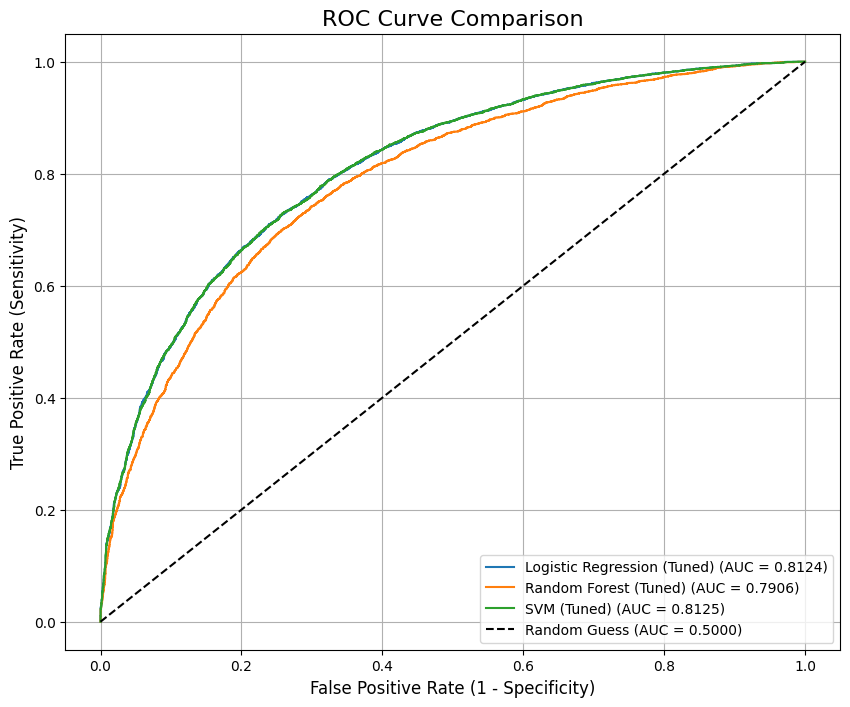

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import random as sparse_random

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

print("\nTuning SVM (LinearSVC) model...")
param_grid_svm = {'C': [0.1, 1, 10]}

grid_search_svm = GridSearchCV(
    estimator=LinearSVC(random_state=42, dual=True, max_iter=2000),
    param_grid=param_grid_svm,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)
grid_search_svm.fit(X_train_scaled, y_train)
print("\nTuning complete.")
print(f"Best C parameter found: {grid_search_svm.best_params_['C']}")

best_svm = grid_search_svm.best_estimator_


print("\n--- Tuned SVM (LinearSVC) Results ---")
y_pred_svm = best_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svm, target_names=['Negative (0)', 'Positive (1)']))


y_scores_svm = best_svm.decision_function(X_test_scaled)
auc_svm = roc_auc_score(y_test, y_scores_svm)
print(f"ROC AUC Score: {auc_svm:.4f}")

roc_results['SVM (Tuned)'] = {'y_pred_proba': y_scores_svm, 'auc': auc_svm}

print("\nSVM evaluation complete. Results added to roc_results.")


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

if 'roc_results' in locals() and roc_results:
    print("\nPlotting ROC Curves for all evaluated models...")
    plt.figure(figsize=(10, 8))

    for model_name, results in roc_results.items():
        fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba'])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {results['auc']:.4f})")

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5000)')

    plt.title('ROC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("Error: 'roc_results' dictionary not found or is empty. Please run model evaluations first.")

SVM

c:\Users\LAB\Downloads\Twitter Sentiment\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-23 22:00:40,918] A new study created in memory with name: no-name-c83035be-6296-4014-9b5a-cbd343aca12e
C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\1763469656.py:16: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 100, 1000,2000),
c:\Users\LAB\Downloads\Twitter Sentiment\.ven


Starting hyperparameter tuning with Optuna...


[I 2025-10-23 22:00:49,472] Trial 0 finished with value: 0.735771303194977 and parameters: {'n_estimators': 100, 'learning_rate': 0.004939956700145434, 'num_leaves': 58, 'max_depth': 9, 'reg_alpha': 2.35554482729034, 'reg_lambda': 5.703798841298708e-05, 'min_child_samples': 62, 'feature_fraction': 0.6178248055477484, 'bagging_fraction': 0.8675959614790102, 'bagging_freq': 7}. Best is trial 0 with value: 0.735771303194977.
C:\Users\LAB\AppData\Local\Temp\ipykernel_23940\1763469656.py:16: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
Positional arguments ['self', 'name', 'low', 'high', 'step', 'log'] in suggest_int() have been deprecated since v3.5.0. They will be replaced with the corresponding keyword arguments in v5.0.0, so please use the keyword specification instead. See https://github.com/optuna/optuna/releases/tag/v3.5.0 for details.
  'n_estimators': trial.suggest_int('n_estimators', 100, 1000,2000),
c:\


Optuna tuning complete.

--- Best Performing Model (from Optuna) ---
Best F1-Score during search: 0.7569
Best parameters found:
{'n_estimators': 100, 'learning_rate': 0.06523109697624414, 'num_leaves': 73, 'max_depth': 11, 'reg_alpha': 3.644407226472679e-05, 'reg_lambda': 1.5746055052357859e-07, 'min_child_samples': 15, 'feature_fraction': 0.7054699256071981, 'bagging_fraction': 0.8160669893021757, 'bagging_freq': 2}

Training final best LightGBM model...
Final model training complete.

--- Final Evaluation on Test Set ---
Accuracy of Tuned Model: 0.7576

Classification Report for the Tuned LightGBM Model:
              precision    recall  f1-score   support

Negative (0)       0.76      0.75      0.75      4977
Positive (1)       0.75      0.77      0.76      5023

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

ROC AUC Score: 0.8373

LightGBM evaluation complete. Resul

c:\Users\LAB\Downloads\Twitter Sentiment\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\LAB\Downloads\Twitter Sentiment\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


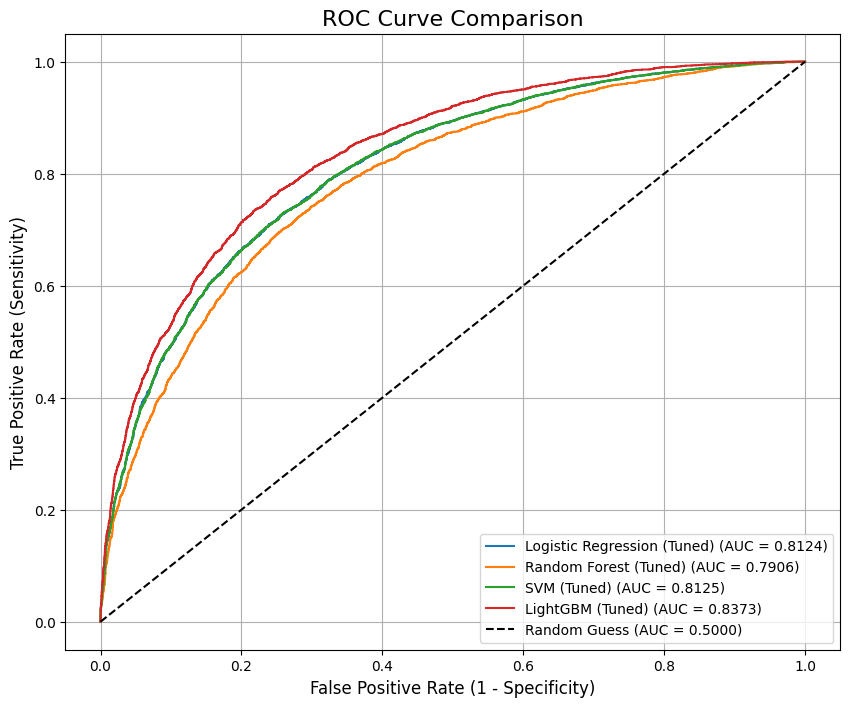

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import random as sparse_random
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import optuna

def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000,2000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 80),
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'random_state': 42,
        'n_jobs': 1
    }

    model = lgb.LGBMClassifier(**param)

    score = cross_val_score(
        model, 
        X_train_scaled, 
        y_train, 
        cv=3, 
        scoring='f1_macro', 
        n_jobs=-1
    ).mean()

    return score

print("\nStarting hyperparameter tuning with Optuna...")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("\nOptuna tuning complete.")


print("\n--- Best Performing Model (from Optuna) ---")
print(f"Best F1-Score during search: {study.best_value:.4f}")
print("Best parameters found:")
print(study.best_params)

best_params = study.best_params
best_params['objective'] = 'binary'
best_params['metric'] = 'binary_logloss'
best_params['verbosity'] = -1
best_params['boosting_type'] = 'gbdt'

best_lgbm = lgb.LGBMClassifier(**best_params, n_jobs=-1, random_state=42)

print("\nTraining final best LightGBM model...")
best_lgbm.fit(X_train_scaled, y_train)
print("Final model training complete.")


print("\n--- Final Evaluation on Test Set ---")
y_pred_tuned = best_lgbm.predict(X_test_scaled)

print(f"Accuracy of Tuned Model: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report for the Tuned LightGBM Model:")
print(classification_report(y_test, y_pred_tuned, target_names=['Negative (0)', 'Positive (1)']))


y_pred_proba_lgbm = best_lgbm.predict_proba(X_test_scaled)[:, 1]
auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
print(f"ROC AUC Score: {auc_lgbm:.4f}")

roc_results['LightGBM (Tuned)'] = {'y_pred_proba': y_pred_proba_lgbm, 'auc': auc_lgbm}
print("\nLightGBM evaluation complete. Results added to roc_results.")

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

if 'roc_results' in locals() and roc_results:
    print("\nPlotting ROC Curves for all evaluated models...")
    plt.figure(figsize=(10, 8))

    for model_name, results in roc_results.items():
        fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba'])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {results['auc']:.4f})")

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5000)')

    plt.title('ROC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("Error: 'roc_results' dictionary not found or is empty. Please run model evaluations first.")

Light GBM using the Hyparametric grid search

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import random as sparse_random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC
import lightgbm as lgb
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from scipy.stats import randint, uniform
import optuna


print("\nDefining best Logistic Regression...")
param_grid_lr = {'C': [10]}
grid_search_lr = GridSearchCV(LogisticRegression(solver='saga', n_jobs=1, max_iter=1000, random_state=42), param_grid_lr, cv=3, scoring='f1_macro')
grid_search_lr.fit(X_train_scaled, y_train)
best_log_reg = grid_search_lr.best_estimator_

print("\nDefining best Random Forest...")
best_params_rf = {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 149}
best_rf = RandomForestClassifier(**best_params_rf, n_jobs=-1, random_state=42)
best_rf.fit(X_train_scaled, y_train)

print("\nDefining best SVM...")
param_grid_svm = {'C': [1]}
grid_search_svm = GridSearchCV(LinearSVC(random_state=42, dual=True, max_iter=2000), param_grid_svm, cv=3, scoring='f1_macro')
grid_search_svm.fit(X_train_scaled, y_train)
best_svm = grid_search_svm.best_estimator_
from sklearn.calibration import CalibratedClassifierCV
best_svm_calibrated = CalibratedClassifierCV(best_svm, cv=3)
best_svm_calibrated.fit(X_train_scaled, y_train)

print("\nDefining best LightGBM...")
best_params_lgbm = {'n_estimators': 459, 'learning_rate': 0.035877998160001694, 'num_leaves': 33, 'objective': 'binary', 'metric': 'binary_logloss', 'verbosity': -1, 'boosting_type': 'gbdt'}
best_lgbm = lgb.LGBMClassifier(**best_params_lgbm, n_jobs=-1, random_state=42)
best_lgbm.fit(X_train_scaled, y_train)

print("-" * 50)

print("\nSetting up and training the Voting Classifier...")
voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_log_reg),
        ('rf', best_rf),
        ('svm', best_svm_calibrated),
        ('lgbm', best_lgbm)
    ],
    voting='soft'
)

voting_clf.fit(X_train_scaled, y_train)
print("Voting Classifier training complete.")

y_pred_voting = voting_clf.predict(X_test_scaled)
print("\n--- Tuned Voting Classifier Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_voting, target_names=['Negative (0)', 'Positive (1)']))

y_pred_proba_voting = voting_clf.predict_proba(X_test_scaled)[:, 1]
auc_voting = roc_auc_score(y_test, y_pred_proba_voting)
print(f"ROC AUC Score: {auc_voting:.4f}")

roc_results['Voting Classifier (Tuned)'] = {'y_pred_proba': y_pred_proba_voting, 'auc': auc_voting}
print("\nVoting Classifier evaluation complete. Results added to roc_results.")


Defining best Logistic Regression...


c:\Users\LAB\Downloads\Twitter Sentiment\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Defining best Random Forest...

Defining best SVM...

Defining best LightGBM...
--------------------------------------------------

Setting up and training the Voting Classifier...
Voting Classifier training complete.

--- Tuned Voting Classifier Results ---
Accuracy: 0.7541

Classification Report:
              precision    recall  f1-score   support

Negative (0)       0.75      0.76      0.75      4977
Positive (1)       0.76      0.75      0.75      5023

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

ROC AUC Score: 0.8302

Voting Classifier evaluation complete. Results added to roc_results.


c:\Users\LAB\Downloads\Twitter Sentiment\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\LAB\Downloads\Twitter Sentiment\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


RandomForest, LightGBM amd SVM using voting classifoer tested on a well defined Hyparametric Grid


Plotting ROC Curves for all evaluated models...


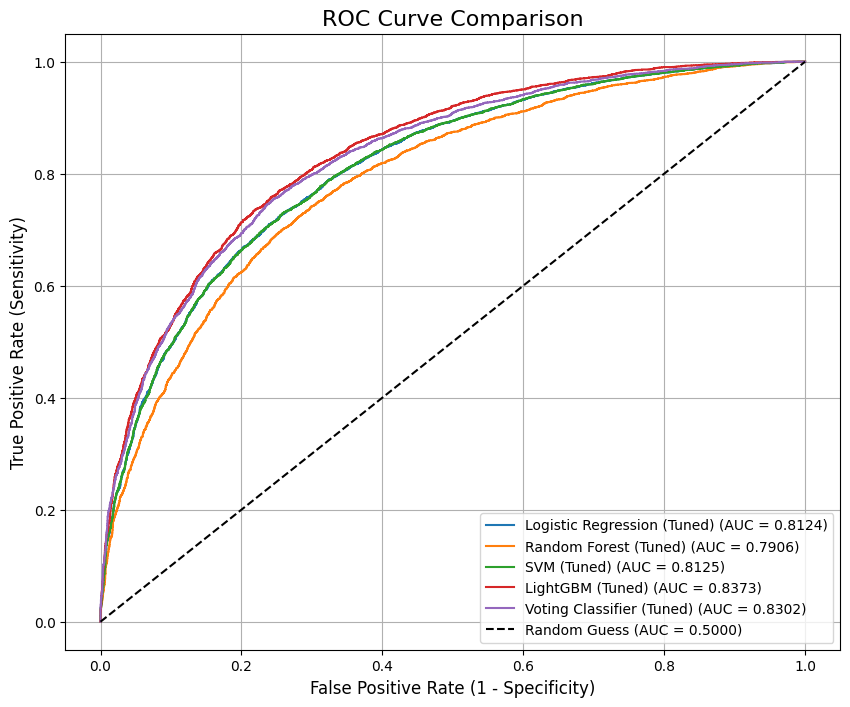

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

if 'roc_results' in locals() and roc_results:
    print("\nPlotting ROC Curves for all evaluated models...")
    plt.figure(figsize=(10, 8))

    for model_name, results in roc_results.items():
        fpr, tpr, _ = roc_curve(y_test, results['y_pred_proba'])
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {results['auc']:.4f})")

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5000)')

    plt.title('ROC Curve Comparison', fontsize=16)
    plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
else:
    print("Error: 'roc_results' dictionary not found or is empty. Please run model evaluations first.")

Final ROC AUC Plot

The best Model found using supervised learning was LightGbm

Now Moving To BERT 

In [ ]:
import pandas as pd
from datasets import Dataset

file_path = '/content/drive/MyDrive/Colab datasets/training.1600000.processed.noemoticon.csv'
df_bert = pd.read_csv(file_path, encoding='latin-1')
columns_names = ['target', 'ids', 'date', 'flag', 'user', 'text']

df_bert.columns = columns_names

df_bert['target'] = df_bert['target'].replace(4, 1)
df_sample = df_bert.sample(n=100000, random_state=42)

dataset = Dataset.from_pandas(df_sample)

In [ ]:
train_test_split = dataset.train_test_split(test_size=0.1)
train_dataset = train_test_split['train']
eval_dataset = train_test_split['test']

print(f"Training data: {len(train_dataset)} rows")
print(f"Evaluation data: {len(eval_dataset)} rows")

Training data: 90000 rows
Evaluation data: 10000 rows


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenize_function(batch):
    return tokenizer(batch['text'], padding="max_length", truncation=True)

print("\nTokenizing the dataset...")
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_eval_dataset = eval_dataset.map(tokenize_function, batched=True)
print("Tokenization complete.")


Tokenizing the dataset...


Map:   0%|          | 0/90000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Tokenization complete.


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    run_name="my-bert-finetune-100k",
    num_train_epochs=2,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    learning_rate=2e-5,
    weight_decay=0.01,
    fp16=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_eval_dataset,
)

In [ ]:
print("\nStarting fine-tuning...")
trainer.train()
print("Fine-tuning complete.")


Starting fine-tuning...


Step,Training Loss
500,0.469200
1000,0.409100
1500,0.400600
2000,0.391000
2500,0.381300
3000,0.361500
3500,0.318600
4000,0.306400
4500,0.308400
5000,0.306500


Fine-tuning complete.


In [ ]:
tokenized_train_dataset = tokenized_train_dataset.rename_column("target", "labels")
tokenized_eval_dataset = tokenized_eval_dataset.rename_column("target", "labels")

print("Renamed 'target' column to 'labels' in train and eval datasets.")

Renamed 'target' column to 'labels' in train and eval datasets.


In [ ]:
import numpy as np

print("Making predictions on the evaluation dataset...")
pred_output = trainer.predict(tokenized_eval_dataset)

y_pred_bert = np.argmax(pred_output.predictions, axis=1)

y_true_bert = pred_output.label_ids

print("Predictions complete.")

Making predictions on the evaluation dataset...


Predictions complete.



--- Fine-Tuned BERT Classification Report ---
              precision    recall  f1-score   support

Negative (0)       0.84      0.85      0.85      4947
Positive (1)       0.85      0.85      0.85      5053

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


--- Fine-Tuned BERT Confusion Matrix ---


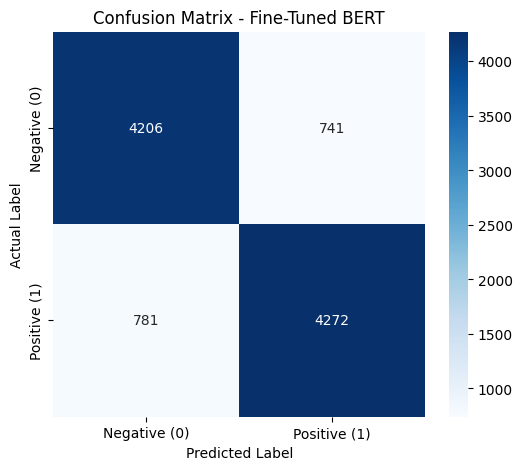

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Fine-Tuned BERT Classification Report ---")
print(classification_report(y_true_bert, y_pred_bert, target_names=['Negative (0)', 'Positive (1)']))

print("\n--- Fine-Tuned BERT Confusion Matrix ---")
cm = confusion_matrix(y_true_bert, y_pred_bert)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])

plt.title('Confusion Matrix - Fine-Tuned BERT')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()